___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, XGBoost,and Neural Network*** algorithms and ***Unbalanced Data Techniques*** . Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

Data drift and model drirft are key consepts about ML and MLOPS, you can monitor and check your data and models with plenty of ways and tools. ***Deepchecks*** is one of them and the leading tool for testing and for validating your machine learning models and data, and it enables doing so with minimal effort. In this project, you will apply ***Data Integrity, Train-Test Validation, and Model Evaluation*** checks.
Deepchecks Intruduction : https://youtu.be/7ELdizoi6BU

At the end of the project, you will have the opportunity to deploy your model by ***Streamlit API***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement (Streamlit) as well as the theory behind algorithms*



---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can display the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the Unbalanced Data Techniques used to increase the performance. Next, observe their effects.

Then, you will use four different algorithms in the model building phase. 

In the final step, you will deploy your model using ***Streamlit API***. 

**Optional**: You can Dockerize your project and deploy on cloud.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Apply data integrity checks
- Exploratory Data Analysis
- Data Cleaning
    
#### 2. Data Preprocessing

- Train - Test Split
- Train - Test Split Validation Checks
- Scaling

#### 3. Model Building

- Logistic Regression 
- Random Forest Classifier
- XGBoost Classifier
- Neural Network
- 

#### 4. Model Deployement

- Save and Export the Best Model
- Save and Export Variables




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff


import scipy.stats as stats
from scipy.cluster.hierarchy import linkage, dendrogram
import statsmodels.api as sm
import statsmodels.formula.api as smf
# import missingno as msno
import datetime as dt
from datetime import datetime
from pyclustertend import hopkins
# import optuna
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, cross_val_predict, train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, scale, StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures, PowerTransformer
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
# from catboost import CatBoostClassifier
# from lightgbm import LGBMClassifier
from xgboost import XGBRegressor, XGBClassifier, plot_importance
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
# Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.000,-11.881,10.072,-9.835,-2.067,-5.364,-2.607,-4.918,7.305,1.914,4.356,-1.593,2.712,-0.689,4.627,-0.924,1.108,1.992,0.511,-0.683,1.476,0.213,0.112,1.014,-0.509,1.437,0.250,0.944,0.824,0.770,0
284803,172787.000,-0.733,-0.055,2.035,-0.739,0.868,1.058,0.024,0.295,0.585,-0.976,-0.150,0.916,1.215,-0.675,1.165,-0.712,-0.026,-1.221,-1.546,0.060,0.214,0.924,0.012,-1.016,-0.607,-0.395,0.068,-0.054,24.790,0
284804,172788.000,1.920,-0.301,-3.250,-0.558,2.631,3.031,-0.297,0.708,0.432,-0.485,0.412,0.063,-0.184,-0.511,1.329,0.141,0.314,0.396,-0.577,0.001,0.232,0.578,-0.038,0.640,0.266,-0.087,0.004,-0.027,67.880,0
284805,172788.000,-0.240,0.530,0.703,0.690,-0.378,0.624,-0.686,0.679,0.392,-0.399,-1.934,-0.963,-1.042,0.450,1.963,-0.609,0.510,1.114,2.898,0.127,0.265,0.800,-0.163,0.123,-0.569,0.547,0.109,0.105,10.000,0
284806,172792.000,-0.533,-0.190,0.703,-0.506,-0.013,-0.650,1.577,-0.415,0.486,-0.915,-1.040,-0.032,-0.188,-0.084,0.041,-0.303,-0.660,0.167,-0.256,0.383,0.261,0.643,0.377,0.009,-0.474,-0.818,-0.002,0.014,217.000,0


In [5]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
194683,130716.000,-0.577,-0.830,1.058,-1.923,-0.088,-1.070,-0.304,0.012,-0.511,0.019,-0.869,-0.366,0.788,-0.802,-0.533,1.304,-0.147,-1.244,-0.432,0.423,0.399,0.989,0.039,0.017,0.255,-0.159,0.185,0.028,64.740,0
98487,66682.000,1.204,-0.121,-0.174,-0.049,-0.267,-0.786,0.139,-0.113,-0.092,0.075,0.971,0.195,-1.037,0.774,0.293,0.389,-0.518,0.109,0.500,-0.032,-0.038,-0.273,-0.111,0.055,0.392,1.011,-0.121,-0.012,49.950,0
139531,83195.000,1.352,-0.651,-0.885,-0.482,1.470,3.830,-1.088,0.915,-0.574,0.690,-0.855,0.008,0.097,-0.154,-0.355,-1.595,-0.234,1.405,-0.373,-0.435,-0.493,-0.860,-0.061,0.977,0.756,-0.298,0.069,0.022,11.500,0
236203,148709.000,0.209,-3.946,-1.544,0.270,-1.903,0.150,0.301,-0.239,-0.087,0.310,0.405,0.987,1.054,0.163,0.314,-0.930,-0.802,2.479,-0.970,1.398,0.486,-0.154,-0.719,-0.386,-0.495,-0.661,-0.100,0.129,980.000,0
16608,27970.000,-0.907,-0.208,3.547,-0.547,-0.623,1.747,-0.632,0.697,1.420,-1.058,0.485,0.750,-1.264,-1.223,-1.986,-0.660,0.427,-0.428,-0.501,-0.132,0.140,0.999,-0.401,-0.200,0.143,0.854,-0.078,-0.175,5.480,0


In [6]:
df[df["Class"] == 1].sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
149357,91075.000,-1.855,1.555,-1.406,0.669,-0.280,1.179,-3.460,-2.815,1.242,-4.156,2.209,-5.122,0.661,-3.104,-2.411,-2.425,-3.961,-0.125,0.600,0.537,-0.095,0.947,-0.297,-0.368,0.199,-0.079,0.367,0.074,38.760,1
276071,166883.000,2.092,-0.757,-1.192,-0.755,-0.620,-0.322,-1.083,0.117,-0.141,0.249,1.338,-0.330,-0.364,-1.825,-0.230,1.842,1.194,0.037,0.423,0.037,0.288,0.832,0.142,0.593,-0.196,-0.137,0.020,-0.015,19.950,1
150601,93742.000,-3.291,4.401,-8.394,4.454,-4.790,-4.240,-9.219,1.974,-2.913,-13.540,9.413,-18.048,-0.728,-15.393,0.349,-13.304,-21.298,-7.262,2.274,1.491,2.102,0.597,-0.328,0.446,0.585,-0.399,2.116,1.051,1.000,1
275992,166831.000,-2.027,-1.132,-1.135,1.087,-0.011,0.424,3.791,-1.156,-0.063,1.334,1.032,-0.722,-1.533,0.334,0.297,-0.429,-0.825,0.490,0.873,0.034,-0.315,0.576,0.491,0.757,-0.143,-0.603,0.509,-0.092,634.300,1
42756,41233.000,-10.646,5.918,-11.671,8.807,-7.976,-3.587,-13.617,6.428,-7.368,-12.888,6.855,-13.212,1.036,-13.779,1.040,-11.290,-20.578,-7.548,3.118,-0.046,2.572,0.207,-1.668,0.558,-0.028,0.354,0.273,-0.153,0.000,1


In [7]:
df = df.rename(columns={"Time": "time", "Amount": "amount", "Class": "class"})

In [8]:
df.groupby("class")[df.columns].mean()

,time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,amount,class
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202,0.008,-0.006,0.012,-0.008,0.005,0.002,0.010,-0.001,0.004,0.010,-0.007,0.011,0.000,0.012,0.000,0.007,0.012,0.004,-0.001,-0.001,-0.001,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,88.291,0.000
1,80746.807,-4.772,3.624,-7.033,4.542,-3.151,-1.398,-5.569,0.571,-2.581,-5.677,3.800,-6.259,-0.109,-6.972,-0.093,-4.140,-6.666,-2.246,0.681,0.372,0.714,0.014,-0.040,-0.105,0.041,0.052,0.171,0.076,122.211,1.000


In [9]:
df.duplicated().sum()

1081

In [10]:
print("Shape before dropping duplicates", df.shape)
df = df.drop_duplicates(ignore_index=True)
print("Shape after dropping duplicates", df.shape)

Shape before dropping duplicates (284807, 31)
Shape after dropping duplicates (283726, 31)


In [11]:
df_copy = df.copy()

In [12]:
df['hour'] = df['time'].apply(lambda x: np.floor(x / 3600))

In [13]:
df_copy2 = df.copy()

## Apply Data Integrity Checks
* link: https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_data_integrity.html

In [14]:
# conda install -c conda-forge deepchecks

In [15]:
from deepchecks.tabular import Dataset

In [16]:
ds = Dataset(df, label="class", datetime_name="time",cat_features=[])
ds

,Column,DType,Kind,Additional Info
0,time,datetime64,Datetime,
1,class,integer,,
2,V1,floating,Numerical Feature,
3,V2,floating,Numerical Feature,
4,V3,floating,Numerical Feature,
5,V4,floating,Numerical Feature,
6,V5,floating,Numerical Feature,
7,V6,floating,Numerical Feature,
8,V7,floating,Numerical Feature,
9,V8,floating,Numerical Feature,


In [17]:
from deepchecks.tabular.suites import data_integrity

In [18]:
# Run Suite:
integ_suite = data_integrity()
suite_result = integ_suite.run(ds)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

deepchecks - WARNING - Due to the small number of unique labels task type was inferred as classification in spite of the label column is of type integer. Initialize your Dataset with either label_type="multiclass" or label_type="regression" to resolve this warning.


Accordion(children=(VBox(children=(HTML(value='\n            <h1 id="summary_RXZY7SKAP3XI2GANLJYQLITPU">Data I…

### Exploratory Data Analysis & Data Cleaning

In [19]:
df.describe()

,time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,amount,class,hour
count,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000,283726.000
mean,94811.078,0.006,-0.004,0.002,-0.003,0.002,-0.001,0.002,-0.001,-0.002,-0.001,0.000,-0.001,0.001,0.000,0.001,0.001,0.000,0.002,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.002,0.001,88.473,0.002,25.845
std,47481.048,1.948,1.647,1.509,1.414,1.377,1.332,1.228,1.179,1.095,1.076,1.019,0.995,0.995,0.952,0.915,0.874,0.843,0.837,0.813,0.770,0.724,0.725,0.624,0.606,0.521,0.482,0.396,0.328,250.399,0.041,13.183
min,0.000,-56.408,-72.716,-48.326,-5.683,-113.743,-26.161,-43.557,-73.217,-13.434,-24.588,-4.797,-18.684,-5.792,-19.214,-4.499,-14.130,-25.163,-9.499,-7.214,-54.498,-34.830,-10.933,-44.808,-2.837,-10.295,-2.605,-22.566,-15.430,0.000,0.000,0.000
25%,54204.750,-0.916,-0.600,-0.890,-0.850,-0.690,-0.769,-0.553,-0.209,-0.644,-0.536,-0.762,-0.406,-0.648,-0.426,-0.581,-0.467,-0.484,-0.498,-0.456,-0.211,-0.228,-0.543,-0.162,-0.354,-0.317,-0.327,-0.071,-0.053,5.600,0.000,15.000
50%,84692.500,0.020,0.064,0.180,-0.022,-0.053,-0.275,0.041,0.022,-0.053,-0.093,-0.032,0.139,-0.013,0.050,0.049,0.067,-0.066,-0.002,0.003,-0.062,-0.029,0.007,-0.011,0.041,0.016,-0.052,0.001,0.011,22.000,0.000,23.000
75%,139298.000,1.316,0.800,1.027,0.740,0.612,0.397,0.570,0.326,0.596,0.454,0.740,0.617,0.663,0.492,0.650,0.524,0.399,0.502,0.459,0.133,0.186,0.528,0.148,0.440,0.351,0.240,0.091,0.078,77.510,0.000,38.000
max,172792.000,2.455,22.058,9.383,16.875,34.802,73.302,120.589,20.007,15.595,23.745,12.019,7.848,7.127,10.527,8.878,17.315,9.254,5.041,5.592,39.421,27.203,10.503,22.528,4.585,7.520,3.517,31.612,33.848,25691.160,1.000,47.000


In [20]:
df[df["class"] == 1].describe()

,time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,amount,class,hour
count,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000
mean,80450.514,-4.498,3.406,-6.730,4.473,-2.957,-1.433,-5.176,0.953,-2.522,-5.453,3.716,-6.103,-0.094,-6.836,-0.073,-4.001,-6.463,-2.157,0.669,0.405,0.467,0.087,-0.096,-0.107,0.041,0.050,0.214,0.078,123.872,1.000,21.854
std,48636.180,6.593,4.123,6.910,2.872,5.279,1.715,6.858,5.586,2.465,4.706,2.673,4.582,1.108,4.253,1.046,3.832,6.966,2.902,1.534,1.289,2.731,1.181,1.509,0.518,0.807,0.463,1.246,0.533,260.211,0.000,13.501
min,406.000,-30.552,-8.402,-31.104,-1.313,-22.106,-6.406,-43.557,-41.044,-13.434,-24.588,-1.702,-18.684,-3.128,-19.214,-4.499,-14.130,-25.163,-9.499,-3.682,-4.128,-22.798,-8.887,-19.254,-2.028,-4.782,-1.153,-7.263,-1.869,0.000,1.000,0.000
25%,41203.000,-5.604,1.145,-7.927,2.289,-4.279,-2.450,-6.989,-0.162,-3.797,-7.298,1.929,-8.602,-0.978,-9.505,-0.638,-6.469,-11.589,-4.569,-0.301,-0.160,0.028,-0.522,-0.342,-0.437,-0.320,-0.263,-0.016,-0.097,1.000,1.000,11.000
50%,73408.000,-2.272,2.617,-4.875,4.100,-1.372,-1.420,-2.902,0.618,-2.099,-4.466,3.526,-5.437,-0.064,-6.591,-0.039,-3.303,-5.158,-1.418,0.648,0.286,0.574,0.055,-0.075,-0.061,0.078,0.013,0.395,0.146,9.820,1.000,20.000
75%,129095.000,-0.361,4.572,-2.171,6.291,0.261,-0.414,-0.907,1.709,-0.788,-2.447,5.224,-2.825,0.695,-4.252,0.634,-1.142,-1.129,0.116,1.661,0.821,1.193,0.616,0.288,0.282,0.464,0.396,0.821,0.372,105.890,1.000,35.000
max,170348.000,2.132,22.058,2.250,12.115,11.095,6.474,5.803,20.007,3.354,4.031,12.019,1.376,2.815,3.442,2.471,3.140,6.739,3.790,5.228,11.059,27.203,8.362,5.466,1.091,2.208,2.745,3.052,1.779,2125.870,1.000,47.000


In [21]:
df[df["class"] == 0].describe()

,time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,amount,class,hour
count,283253.000,283253.000,283253.000,283253.000,283253.000,283253.000,283253.000,283253.000,283253.000,283253.000,283253.000,283253.000,283253.000,283253.000,283253.000,283253.000,283253.000,283253.000,283253.000,283253.000,283253.000,283253.000,283253.000,283253.000,283253.000,283253.000,283253.000,283253.000,283253.000,283253.000,283253.000,283253.000
mean,94835.058,0.013,-0.010,0.013,-0.010,0.007,0.001,0.010,-0.002,0.003,0.008,-0.006,0.009,0.001,0.012,0.001,0.008,0.011,0.005,-0.001,-0.000,-0.001,-0.000,0.000,0.000,-0.000,0.000,0.001,0.000,88.414,0.000,25.852
std,47475.551,1.922,1.634,1.458,1.399,1.356,1.330,1.177,1.157,1.087,1.036,1.002,0.945,0.995,0.894,0.915,0.845,0.749,0.825,0.811,0.769,0.716,0.724,0.621,0.606,0.521,0.482,0.393,0.328,250.379,0.000,13.181
min,0.000,-56.408,-72.716,-48.326,-5.683,-113.743,-26.161,-31.765,-73.217,-6.291,-14.741,-4.797,-15.145,-5.792,-18.392,-4.391,-10.116,-17.098,-5.367,-7.214,-54.498,-34.830,-10.933,-44.808,-2.837,-10.295,-2.605,-22.566,-15.430,0.000,0.000,0.000
25%,54233.000,-0.913,-0.601,-0.884,-0.852,-0.688,-0.768,-0.550,-0.209,-0.642,-0.533,-0.763,-0.403,-0.648,-0.423,-0.581,-0.464,-0.483,-0.497,-0.456,-0.212,-0.228,-0.543,-0.161,-0.354,-0.317,-0.327,-0.071,-0.053,5.670,0.000,15.000
50%,84711.000,0.023,0.063,0.182,-0.024,-0.053,-0.274,0.042,0.022,-0.051,-0.092,-0.034,0.141,-0.013,0.051,0.049,0.068,-0.065,-0.001,0.003,-0.063,-0.030,0.007,-0.011,0.041,0.016,-0.052,0.001,0.011,22.000,0.000,23.000
75%,139308.000,1.317,0.797,1.028,0.734,0.612,0.398,0.571,0.324,0.597,0.455,0.737,0.618,0.663,0.493,0.650,0.524,0.399,0.502,0.457,0.133,0.185,0.528,0.148,0.440,0.350,0.240,0.091,0.078,77.460,0.000,38.000
max,172792.000,2.455,18.902,9.383,16.875,34.802,73.302,120.589,18.709,15.595,23.745,10.002,7.848,7.127,10.527,8.878,17.315,9.254,5.041,5.592,39.421,22.615,10.503,22.528,4.585,7.520,3.517,31.612,33.848,25691.160,0.000,47.000


In [22]:
def first_look(col):
    print('column name : ', col)
    print('--------------------------------')
    print('Percent_of_Nulls   : ', '%', round(df[col].isnull().sum() / df.shape[0]*100, 2))
    print('Number_of_Nulls   : ', df[col].isnull().sum())
    print('Number_of_Uniques : ', df[col].nunique())
    print()
    print(f"Value_counts of {col} column:\n", "--"*20,"\n", df[col].value_counts(dropna = False).head(10))
    print()
    if df[col].dtypes == "O" :
        print(f"Value_counts of {col} column with sort_index : \n", "--"*20,"\n", df[col].value_counts(dropna = False).sort_index(key = lambda x : x.str.lower()).head(10))
    else :
        print(f"Value_counts of {col} column with sort_index : \n", "--"*20,"\n", df[col].value_counts(dropna = False).sort_index().head(10))
    print()

In [23]:
for col in df.columns :
    first_look(col)

column name :  time
--------------------------------
Percent_of_Nulls   :  % 0.0
Number_of_Nulls   :  0
Number_of_Uniques :  124592

Value_counts of time column:
 ---------------------------------------- 
 3767.000     21
3770.000     20
19912.000    19
3750.000     19
73885.000    17
3760.000     17
3749.000     17
3766.000     17
3755.000     16
3756.000     15
Name: time, dtype: int64

Value_counts of time column with sort_index : 
 ---------------------------------------- 
 0.000     2
1.000     2
2.000     2
4.000     1
7.000     2
9.000     1
10.000    3
11.000    1
12.000    3
13.000    1
Name: time, dtype: int64

column name :  V1
--------------------------------
Percent_of_Nulls   :  % 0.0
Number_of_Nulls   :  0
Number_of_Uniques :  275663

Value_counts of V1 column:
 ---------------------------------------- 
 1.246    77
2.056    77
2.053    62
1.302    60
2.040    53
2.085    48
1.333    45
1.018    40
1.335    39
1.315    36
Name: V1, dtype: int64

Value_counts of V1 column

 ---------------------------------------- 
 0.407     77
0.691     77
-0.704    62
-0.031    60
-0.597    53
-2.181    48
-1.155    45
-3.045    40
-0.868    39
0.426     36
Name: V14, dtype: int64

Value_counts of V14 column with sort_index : 
 ---------------------------------------- 
 -19.214    1
-18.822    1
-18.494    1
-18.392    1
-18.050    1
-17.722    1
-17.621    1
-17.476    1
-17.230    1
-16.338    1
Name: V14, dtype: int64

column name :  V15
--------------------------------
Percent_of_Nulls   :  % 0.0
Number_of_Nulls   :  0
Number_of_Uniques :  275663

Value_counts of V15 column:
 ---------------------------------------- 
 1.124    77
1.275    77
0.272    62
1.447    60
0.584    53
0.389    48
1.158    45
1.469    40
1.129    39
1.245    36
Name: V15, dtype: int64

Value_counts of V15 column with sort_index : 
 ---------------------------------------- 
 -4.499    1
-4.391    1
-4.199    1
-4.197    1
-4.153    1
-4.098    1
-4.092    1
-4.025    1
-4.006    1
-3.936   

Value_counts of amount column:
 ---------------------------------------- 
 1.000     13566
1.980      6044
0.890      4871
9.990      4738
15.000     3280
0.760      2977
10.000     2948
1.290      2892
1.790      2623
0.990      2304
Name: amount, dtype: int64

Value_counts of amount column with sort_index : 
 ---------------------------------------- 
 0.000    1808
0.010     718
0.020      85
0.030       3
0.040      11
0.050      44
0.060       3
0.070      11
0.080      10
0.090       2
Name: amount, dtype: int64

column name :  class
--------------------------------
Percent_of_Nulls   :  % 0.0
Number_of_Nulls   :  0
Number_of_Uniques :  2

Value_counts of class column:
 ---------------------------------------- 
 0    283253
1       473
Name: class, dtype: int64

Value_counts of class column with sort_index : 
 ---------------------------------------- 
 0    283253
1       473
Name: class, dtype: int64

column name :  hour
--------------------------------
Percent_of_Nulls   :  % 0.

In [24]:
df.isnull().sum().sum()

0

In [25]:
df["class"].value_counts()

0    283253
1       473
Name: class, dtype: int64

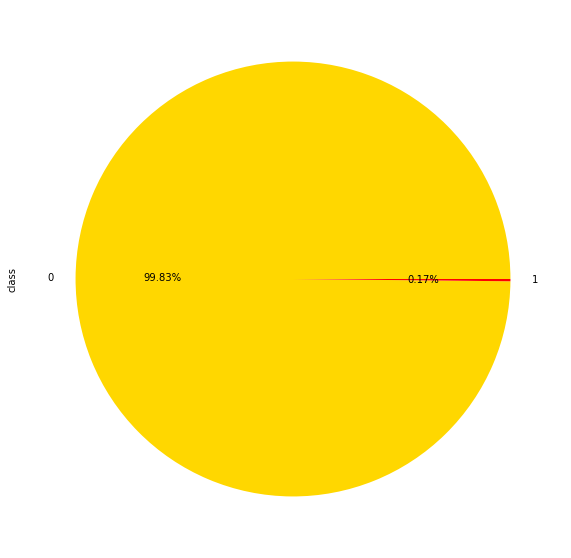

In [26]:
colors = ["gold", "red"]
df["class"].value_counts().plot(kind="pie", autopct='%1.2f%%', figsize=(10,10),colors=colors);

[Text(0, 0, '283253'), Text(0, 0, '473')]

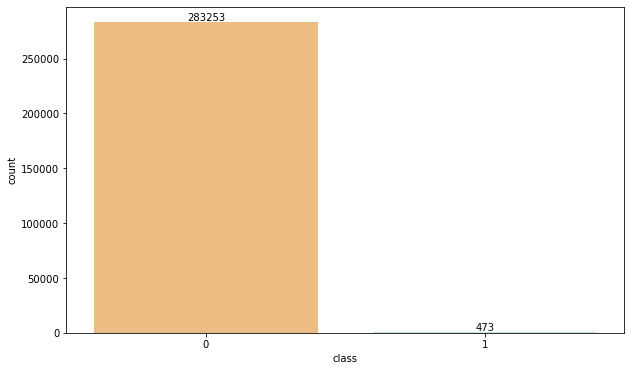

In [27]:
ax = sns.countplot(x=df["class"], palette="RdYlBu")
ax.bar_label(ax.containers[0])

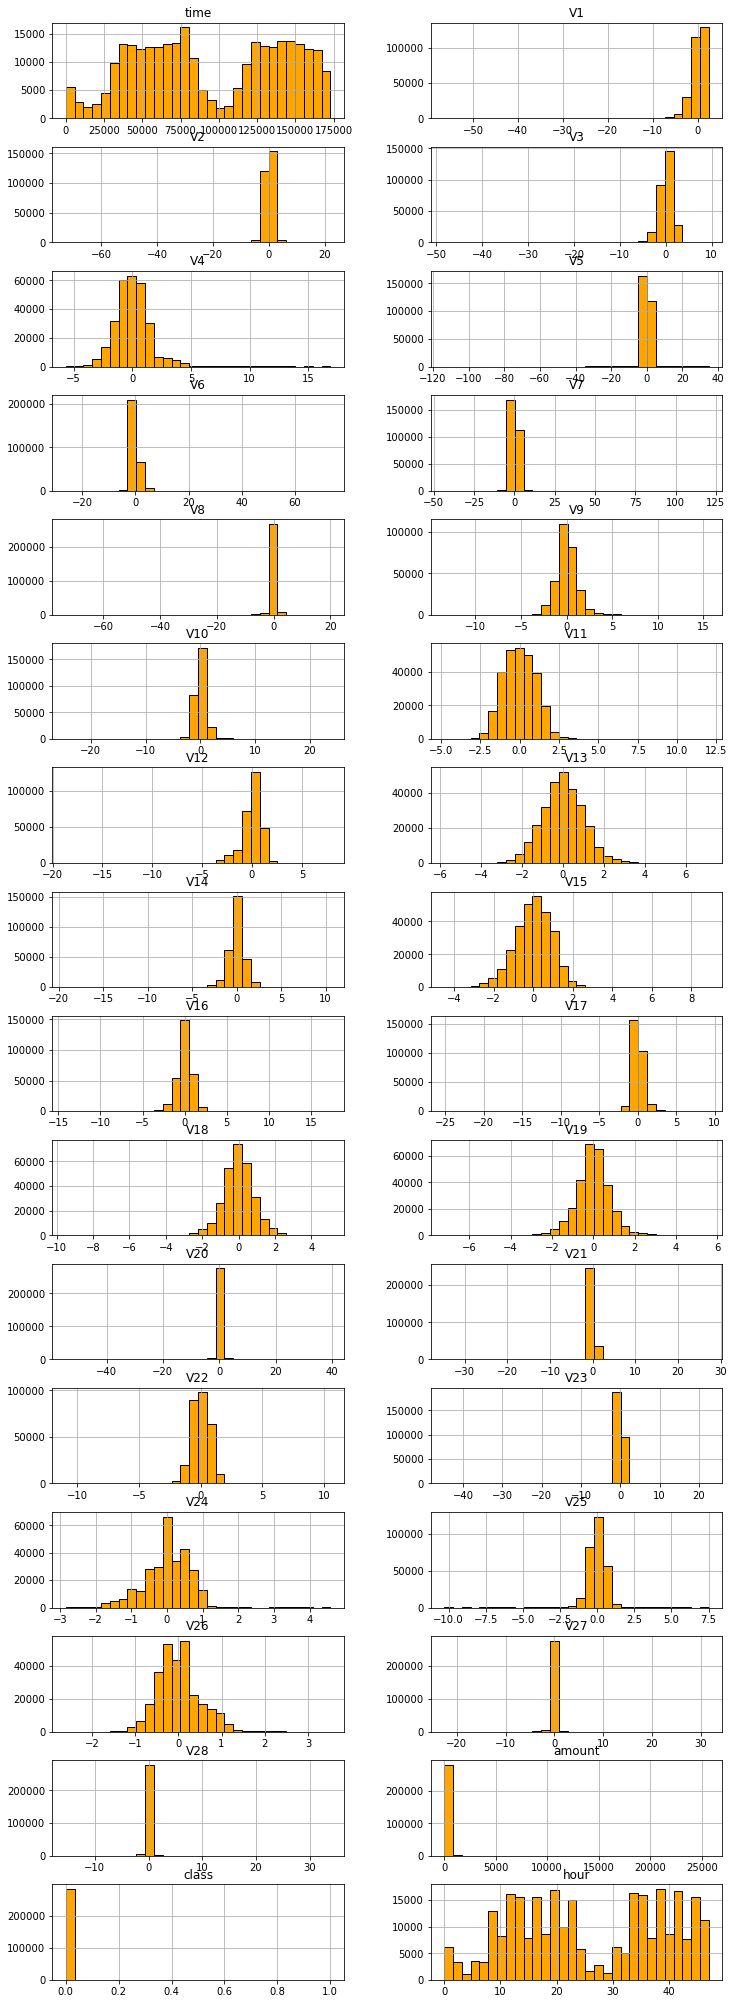

In [28]:
fig_ = df.hist(figsize=(12, 36), layout=(16,2), bins=30, color="orange", edgecolor="black");

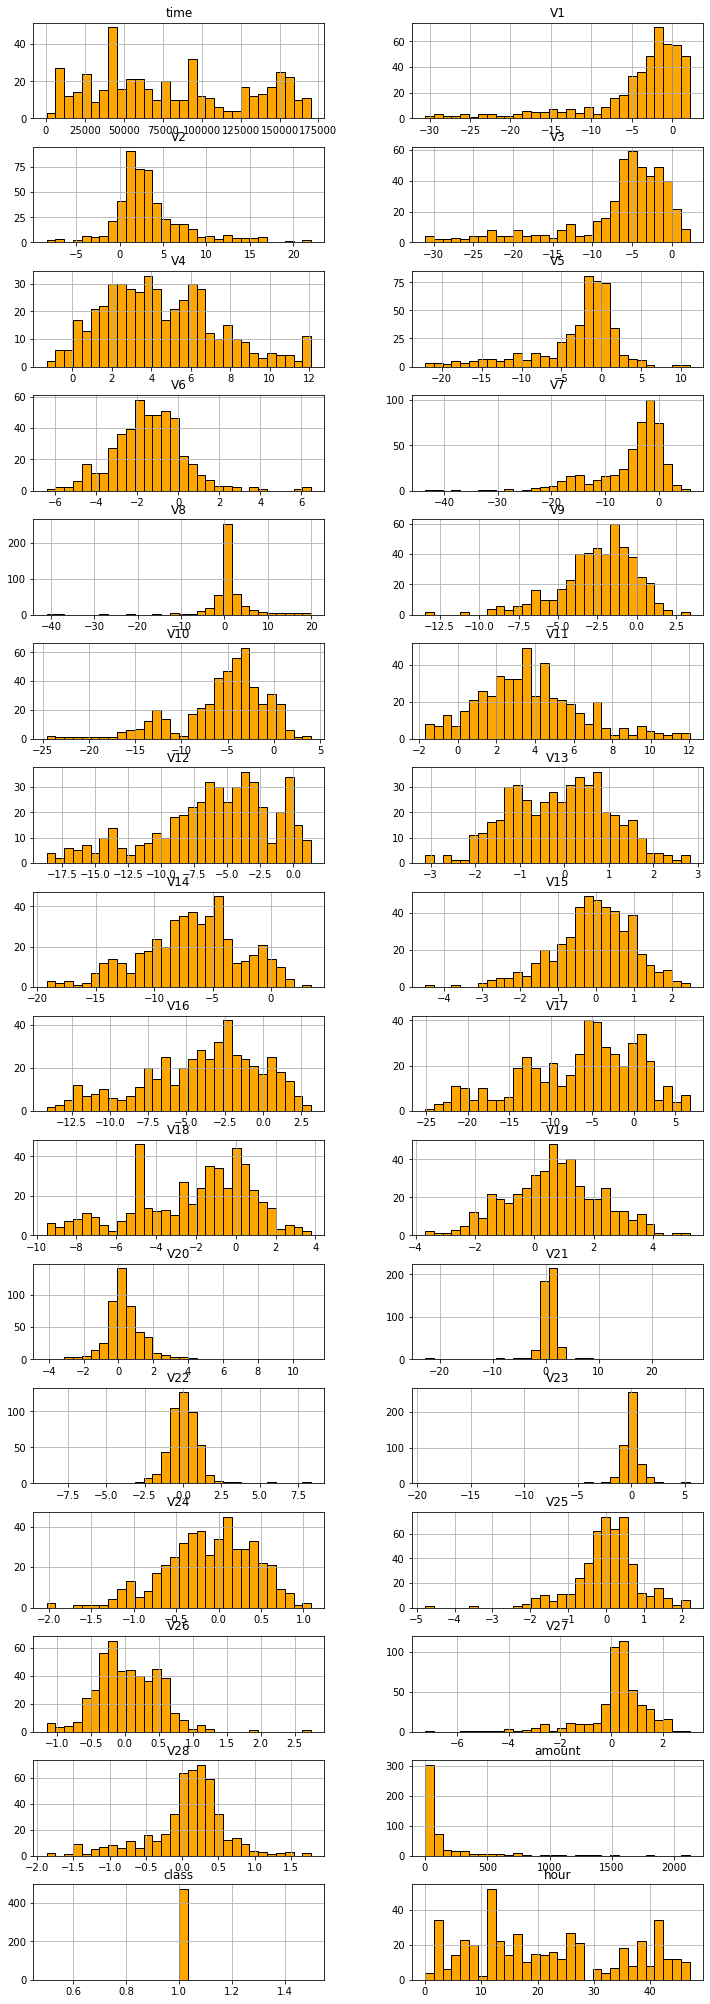

In [29]:
fig_ = df[df["class"] == 1].hist(figsize=(12, 36), layout=(16,2), bins=30, color="orange", edgecolor="black");

In [30]:
df.amount.describe()

count   283726.000
mean        88.473
std        250.399
min          0.000
25%          5.600
50%         22.000
75%         77.510
max      25691.160
Name: amount, dtype: float64

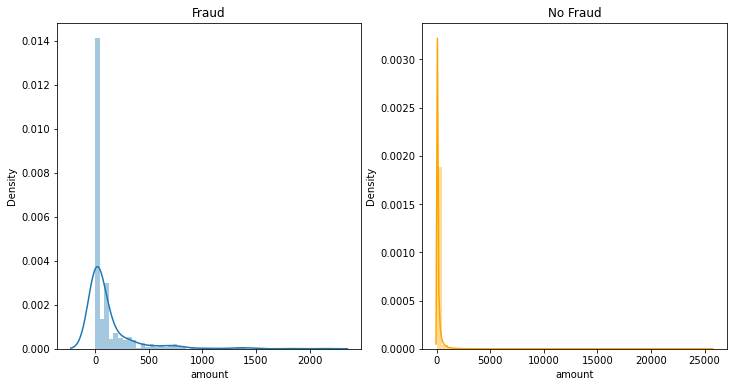

In [31]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

sns.distplot(df[df["class"] == 1].amount, ax=ax[0])
sns.distplot(df[df["class"] == 0].amount, ax=ax[1], color="orange")
ax[0].set_title("Fraud")
ax[1].set_title("No Fraud");

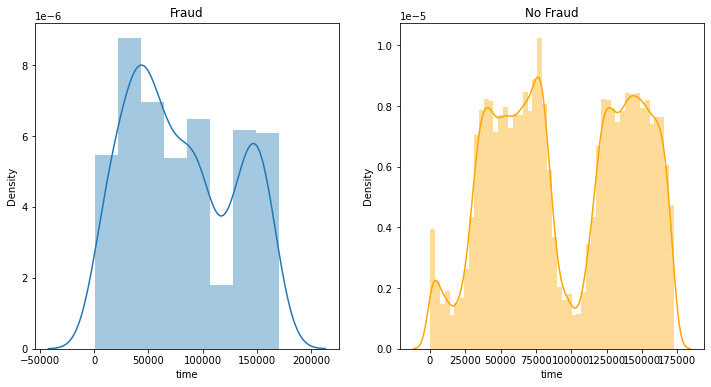

In [32]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

sns.distplot(df[df["class"] == 1].time, ax=ax[0])
sns.distplot(df[df["class"] == 0].time, ax=ax[1], color="orange")
ax[0].set_title("Fraud")
ax[1].set_title("No Fraud");

In [33]:
df.groupby(['hour', 'class'])['amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var'])

min       max  count        sum    mean  median        var
hour   class                                                               
0.000  0       0.000  7712.430   3929 255825.950  65.112  12.990  45961.839
       1       0.000   529.000      2    529.000 264.500 264.500 139920.500
1.000  0       0.000  1769.690   2211 145744.590  65.918  23.000  20085.296
       1      59.000   239.930      2    298.930 149.465 149.465  16367.832
2.000  0       0.000  4002.880   1552 106983.390  68.933  17.985  45434.510
       1       1.000  1809.680     21   1829.780  87.132   1.000 155776.441
3.000  0       0.000  1903.260   1805  94083.790  52.124  15.950  16765.289
       1       0.000   179.660     13    220.050  16.927   1.000   2457.208
4.000  0       0.000  2126.130   1076  79050.360  73.467  15.950  24416.864
       1       1.000   766.360      6    790.260 131.710   3.860  96679.482
5.000  0       0.000  1912.890   1668  75687.280  45.376  11.850  15335.196
       1       1.000  1218.890     11   1416.670 128.788   1.000 133888.937
6.000  0       0.000  1986.920   1819 141809.990  77.960  15.990  33633.070
       1       1.000    99.990      3    104.110  34.703   3.120   3197.885
7.000  0       0.000  6130.210   3343 270521.750  80.922  21.990  53219.295
       1       3.760   730.860     23   2757.780 119.903  99.990  18364.034
8.000  0       0.000  7879.420   5143 468958.550  91.184  28.000  67300.121
       1       0.680   104.810      5    137.150  27.430   0.680   2035.647
9.000  0       0.000  7429.150   7826 798382.400 102.017  30.365  67689.415
       1       0.000   717.150     15   1110.790  74.053  14.460  33239.610
10.000 0       0.000  6950.510   8244 920978.440 111.715  35.000  72300.835
       1      12.310   111.700      2    124.010  62.005  62.005   4939.186
11.000 0       0.000 12910.930   8431 960458.910 113.920  34.870  98742.944
       1       0.000   802.520     43   5393.830 125.438  39.450  41183.131
12.000 0       0.000 11898.090   7694 873073.520 113.475  33.415  88689.677
       1       1.000   105.990      9    224.890  24.988   1.000   1748.049
13.000 0       0.000 19656.530   7556 790822.210 104.661  29.640 122099.192
       1       0.760   360.000      9    600.170  66.686   1.000  16691.676
14.000 0       0.000  5657.540   7999 853292.820 106.675  28.850  77603.477
       1       0.000   519.900     13   1404.870 108.067  99.990  20812.790
15.000 0       0.000  8790.260   7793 800917.000 102.774  28.000  68998.581
       1       0.010   444.170     14   1229.880  87.849   3.395  19722.998
16.000 0       0.000  5317.280   7756 818496.720 105.531  28.985  59971.903
       1       1.000  1389.560     14   2734.640 195.331  32.310 138784.170
17.000 0       0.000  6000.000   7862 831012.480 105.700  24.950  74329.445
       1       0.000  1402.160     12   2916.380 243.032  12.830 180018.847
18.000 0       0.000  6239.540   8538 653479.830  76.538  17.775  41483.505
       1       1.000  1354.250     10   2972.560 297.256  99.755 179492.496
19.000 0       0.000  5303.690   7938 626682.440  78.947  20.000  41391.665
       1       0.760   824.830      7   1802.190 257.456 227.300  91842.096
20.000 0       0.000  4642.200   8938 685464.840  76.691  19.625  43310.151
       1      16.480   311.280      8    873.250 109.156  60.985  12025.707
21.000 0       0.000  2947.080   9861 734318.310  74.467  19.860  31507.193
       1       1.000   254.760     14    977.210  69.801  30.500   7433.106
22.000 0       0.000  5667.560   8940 626434.390  70.071  15.180  37569.028
       1       0.200     7.570      3      8.770   2.923   1.000     16.354
23.000 0       0.000  5268.040   6042 417129.700  69.038  14.900  38514.938
       1       0.000   512.250     13   2011.770 154.752  12.310  33325.846
24.000 0       0.000  2930.700   3712 205700.860  55.415  11.500  21050.656
       1       1.180   829.410      4   1291.070 322.767 230.240 158312.114
25.000 0       0.000  2481.600   1987 117102.130  58.934  15.000 

In [34]:
tm = df.groupby(['hour', 'class'])['amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df_tm = pd.DataFrame(tm)
df_tm.columns = ['hour', 'class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df_tm.head()

,hour,class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.000,0,0.000,7712.430,3929,255825.950,65.112,12.990,45961.839
1,0.000,1,0.000,529.000,2,529.000,264.500,264.500,139920.500
2,1.000,0,0.000,1769.690,2211,145744.590,65.918,23.000,20085.296
3,1.000,1,59.000,239.930,2,298.930,149.465,149.465,16367.832
4,2.000,0,0.000,4002.880,1552,106983.390,68.933,17.985,45434.510


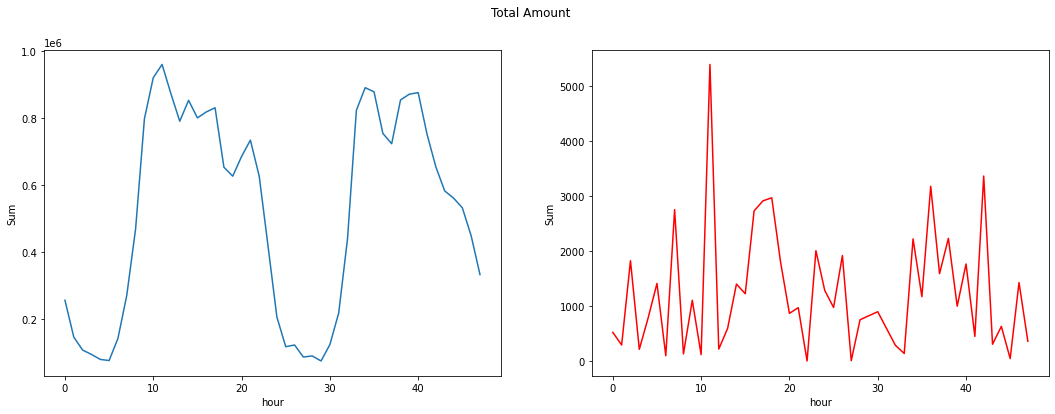

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="hour", y="Sum", data=df_tm.loc[df_tm["class"] == 0])
s = sns.lineplot(ax = ax2, x="hour", y="Sum", data=df_tm.loc[df_tm["class"] == 1], color="red")
plt.suptitle("Total Amount")
plt.show();

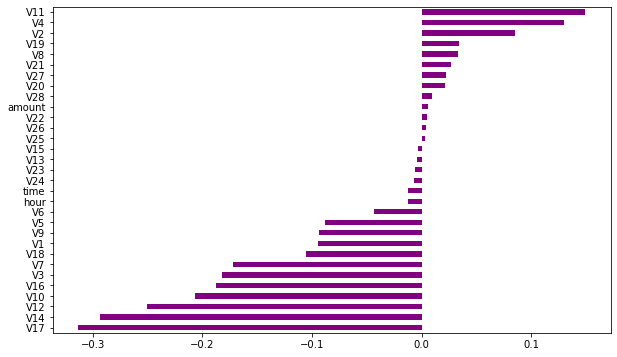

In [36]:
df.corr()["class"].drop("class").sort_values().plot.barh(color='purple' );


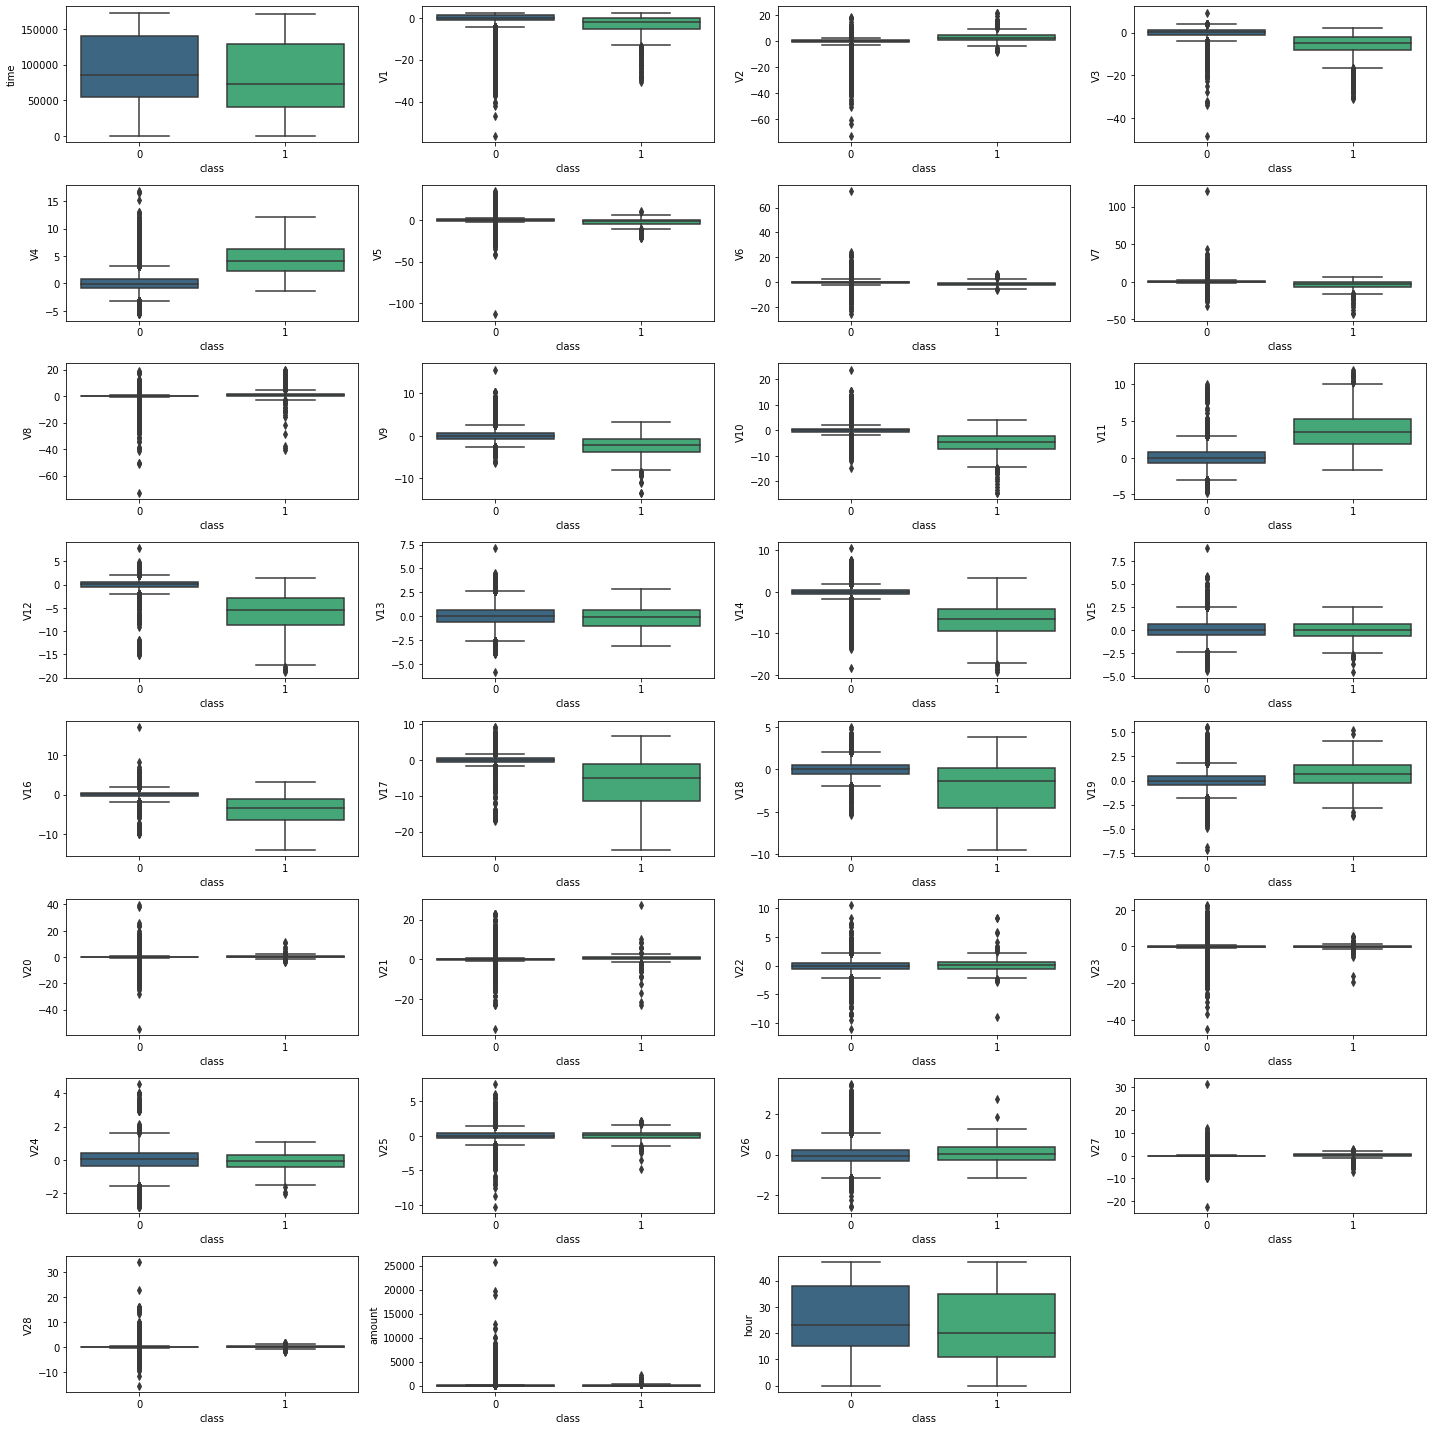

In [37]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns :
    if feature != 'class' :
        index += 1
        plt.subplot(8,4,index)
        sns.boxplot(x = 'class', y = feature, data = df, palette="viridis")
plt.tight_layout()

plt.show();

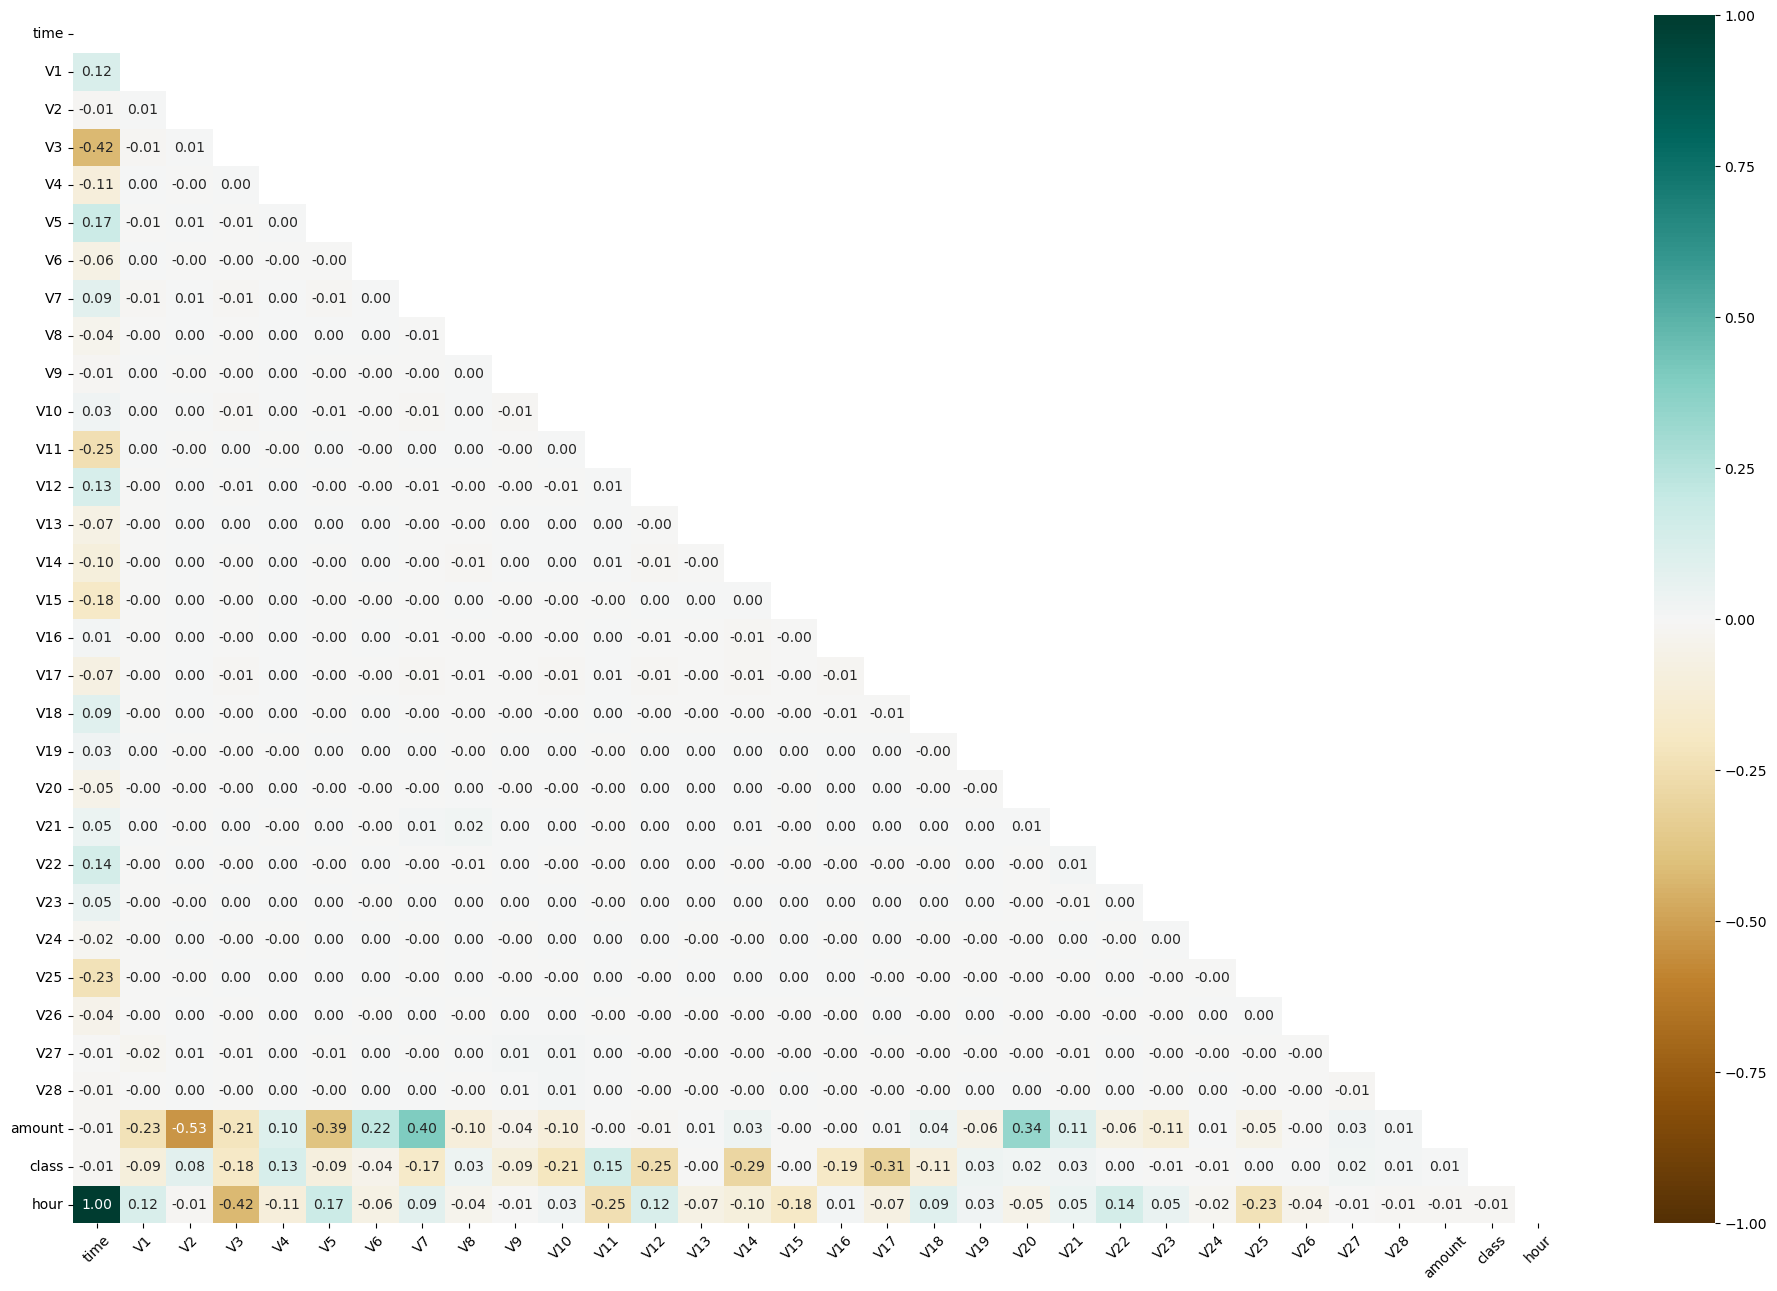

In [38]:
matrix = np.triu(df.corr())
fig,ax = plt.subplots(figsize=(24, 16),dpi=100)
sns.heatmap (df.corr(), annot=True, ax=ax, fmt='.2f', vmin=-1, vmax=1, center=0,mask=matrix, cmap='BrBG')
plt.xticks(rotation = 45);

---
---


## 2. Data Preprocessing

#### Train - Test Split

As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

In [39]:
from deepchecks.tabular import Dataset

In [40]:
df_train,  df_test  = train_test_split(df, test_size=0.2, random_state=101)

## Train-Test Validation Checks
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_train_test_validation.html

In [41]:
categorical_features = []
label = "class" 

In [42]:
# Categorical features can be heuristically inferred, however we
# recommend to state them explicitly to avoid misclassification.

# Metadata attributes are optional. Some checks will run only if specific attributes are declared.

train_ds = Dataset(df_train, label=label,cat_features=categorical_features)
test_ds = Dataset(df_test, label=label,cat_features=categorical_features)

In [43]:
# for convenience lets save it in a dictionary so we can reuse them for future Dataset initializations
columns_metadata = {'cat_features' : categorical_features, 'label':label}

In [44]:
from deepchecks.tabular.suites import train_test_validation

validation_suite = train_test_validation()
suite_result = validation_suite.run(train_ds, test_ds)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

deepchecks - WARNING - Due to the small number of unique labels task type was inferred as classification in spite of the label column is of type integer. Initialize your Dataset with either label_type="multiclass" or label_type="regression" to resolve this warning.


Accordion(children=(VBox(children=(HTML(value='\n            <h1 id="summary_BH61WDJWELT4LWCO816EIO88W">Train …

#### Scaling

In [45]:
X = df.drop(columns="class") 
y = df["class"]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [47]:
scaler = RobustScaler()

In [48]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
df

,time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,amount,class,hour
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0,0.000
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0,0.000
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0,0.000
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0,0.000
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,172786.000,-11.881,10.072,-9.835,-2.067,-5.364,-2.607,-4.918,7.305,1.914,4.356,-1.593,2.712,-0.689,4.627,-0.924,1.108,1.992,0.511,-0.683,1.476,0.213,0.112,1.014,-0.509,1.437,0.250,0.944,0.824,0.770,0,47.000
283722,172787.000,-0.733,-0.055,2.035,-0.739,0.868,1.058,0.024,0.295,0.585,-0.976,-0.150,0.916,1.215,-0.675,1.165,-0.712,-0.026,-1.221,-1.546,0.060,0.214,0.924,0.012,-1.016,-0.607,-0.395,0.068,-0.054,24.790,0,47.000
283723,172788.000,1.920,-0.301,-3.250,-0.558,2.631,3.031,-0.297,0.708,0.432,-0.485,0.412,0.063,-0.184,-0.511,1.329,0.141,0.314,0.396,-0.577,0.001,0.232,0.578,-0.038,0.640,0.266,-0.087,0.004,-0.027,67.880,0,47.000
283724,172788.000,-0.240,0.530,0.703,0.690,-0.378,0.624,-0.686,0.679,0.392,-0.399,-1.934,-0.963,-1.042,0.450,1.963,-0.609,0.510,1.114,2.898,0.127,0.265,0.800,-0.163,0.123,-0.569,0.547,0.109,0.105,10.000,0,47.000


---
---


## 3. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset, we can use undersampling and oversampling or class weight and optimum thresold techniques. 

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

In [50]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print("TEST REPORT")
    print(classification_report(y_test, y_pred_test))
    plot_confusion_matrix(model, X_test, y_test);

    print("\n"*3, "-*"*30)
    print("TRAIN REPORT")
    print(classification_report(y_train, y_pred_train))
    plot_confusion_matrix(model, X_train, y_train);

### Logistic Regression 

- The steps you are going to cover for this algorithm are as follows: 

   *i. Import Libraries*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iv. Plot Precision and Recall Curve*

***i. Import Libraries***

***ii. Model Training***

In [51]:
log_model = LogisticRegression()

In [52]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [53]:
y_pred = log_model.predict(X_test)
y_pred_proba = log_model.predict_proba(X_test)

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56657
           1       0.85      0.58      0.69        89

    accuracy                           1.00     56746
   macro avg       0.93      0.79      0.85     56746
weighted avg       1.00      1.00      1.00     56746




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226596
           1       0.88      0.62      0.72       384

    accuracy                           1.00    226980
   macro avg       0.94      0.81      0.86    226980
weighted avg       1.00      1.00      1.00    226980



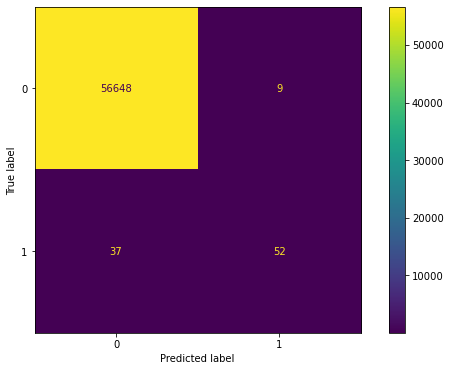

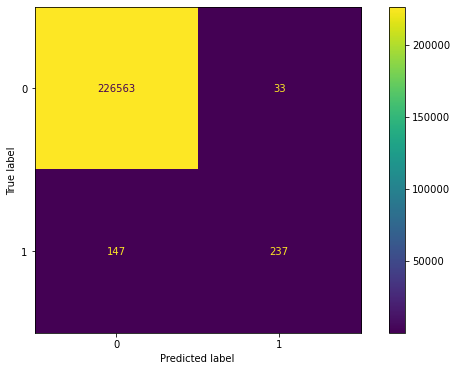

In [54]:
eval_metric(log_model, X_train, y_train, X_test, y_test)

In [55]:
def model_scorer(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision" : precision_score(y_train, y_train_pred),
                            "Recall" : recall_score(y_train, y_train_pred),                          
                            "f1" : f1_score(y_train, y_train_pred)},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision" : precision_score(y_test, y_pred),
                           "Recall" : recall_score(y_test, y_pred),                          
                           "f1" : f1_score(y_test, y_pred)}}
    
    return pd.DataFrame(scores)   

In [56]:
model_scorer(log_model, X_train, y_train, X_test, y_test)

,train_set,test_set
Accuracy,0.999,0.999
Precision,0.878,0.852
Recall,0.617,0.584
f1,0.725,0.693


In [57]:
log_model_accuracy = accuracy_score(y_test, y_pred)
log_model_f1 = f1_score(y_test, y_pred)
log_model_recall = recall_score(y_test,y_pred)
log_model_auc = roc_auc_score(y_test, y_pred)

***iii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

In [58]:
from sklearn.model_selection import StratifiedKFold

In [59]:
 y_pred_proba = log_model.predict_proba(X_test)

In [60]:
precisions, recalls, thresholds = precision_recall_curve(y_pred, y_pred_proba[:,1])


You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

In [61]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.5439873363283559

In [62]:
def cv_kfold(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)       # Index no'ları her işlemden sonra sıfırlaması için.
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [63]:
cv_kfold(10, log_model, pd.DataFrame(X_train), y_train, 0.54)

Accuracy      99.92%  std 0.01%
Precision-1   87.76%  std 3.51%
Recall-1      59.41%  std 6.24%
F1_score-1    70.67%  std 4.82%


***iv. Plot Precision and Recall Curve***


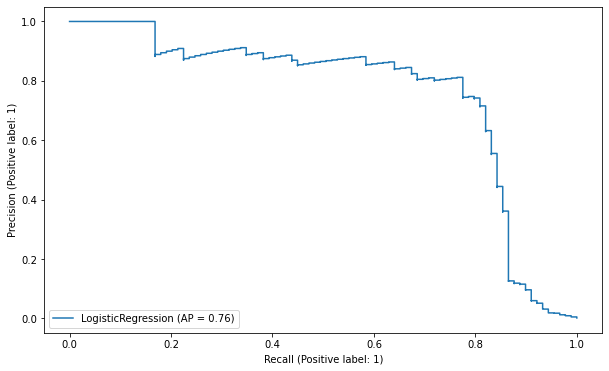

In [64]:
plot_precision_recall_curve(log_model, X_test, y_test)

- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class matrics is not sufficient, apply "unbalanced data tecniques".

In [65]:
# Grid Search

In [66]:
log_grid_model = LogisticRegression(random_state= 42, class_weight='balanced',max_iter=1000)

In [67]:
penalty = ["l1", "l2"]
C = np.logspace(0, 10, 10)
solver = ["lbfgs"] 



param_grid = {"penalty" : penalty,
              "C" : C,
              "solver": solver,       
}

In [68]:
grid_model = GridSearchCV(log_grid_model, param_grid = param_grid,scoring= "recall")

In [69]:
grid_model.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=42),
             param_grid={'C': array([1.00000000e+00, 1.29154967e+01, 1.66810054e+02, 2.15443469e+03,
       2.78255940e+04, 3.59381366e+05, 4.64158883e+06, 5.99484250e+07,
       7.74263683e+08, 1.00000000e+10]),
                         'penalty': ['l1', 'l2'], 'solver': ['lbfgs']},
             scoring='recall')

In [70]:
grid_model.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}

In [71]:
grid_model.best_score_

0.8933014354066984

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56657
           1       0.06      0.93      0.11        89

    accuracy                           0.98     56746
   macro avg       0.53      0.95      0.55     56746
weighted avg       1.00      0.98      0.99     56746




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    226596
           1       0.06      0.91      0.12       384

    accuracy                           0.98    226980
   macro avg       0.53      0.94      0.55    226980
weighted avg       1.00      0.98      0.99    226980



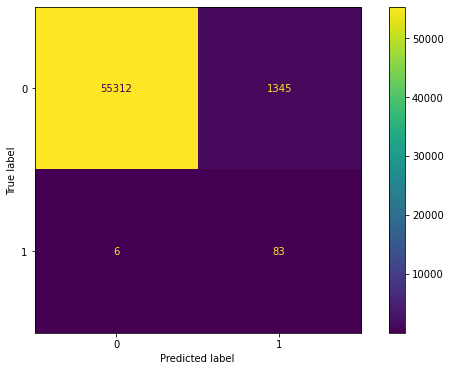

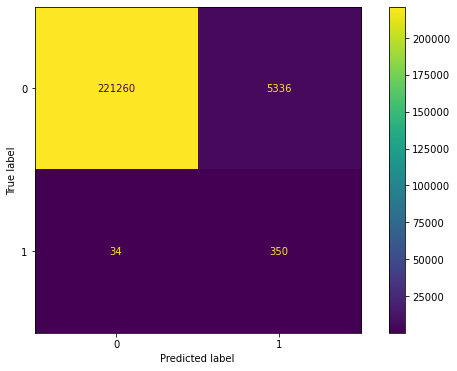

In [72]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

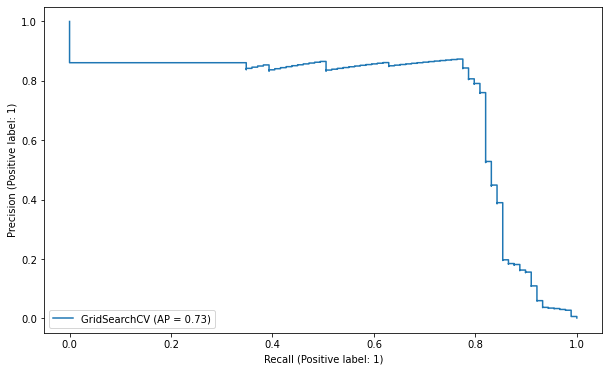

In [73]:
plot_precision_recall_curve(grid_model, X_test, y_test);

In [74]:
y_pred = grid_model.predict(X_test)

In [75]:
log_grid_model_accuracy = accuracy_score(y_test, y_pred)
log_grid_model_f1 = f1_score(y_test, y_pred)
log_grid_model_recall = recall_score(y_test,y_pred)
log_grid_model_auc = roc_auc_score(y_test, y_pred)

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [77]:
train_ds = Dataset(X_train, label=y_train, cat_features=[])
test_ds = Dataset(X_test, label=y_test, cat_features=[])

In [78]:
from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, grid_model)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

deepchecks - WARNING - Could not find built-in feature importance on the model, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 33 seconds


Accordion(children=(VBox(children=(HTML(value='\n            <h1 id="summary_Y5HTHTMUDQAAQ8A86VR2PF577">Model …

### Logistic Regression with Unbalanced Data Techniques

- The steps you are going to cover for this algorithm are as follows: 

   *i. Import Libraries*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iv. Plot Precision and Recall Curve*

#### SHAP With Feature Selection

In [79]:
# import shap

In [80]:
# X = df.drop(columns="class") 
# y = df["class"]

In [81]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [82]:
# scaler = RobustScaler()

In [83]:
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [84]:
# model_shap = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=101, penalty="l1", solver='saga')

In [85]:
# model_shap.fit(X_train_scaled, y_train)

In [86]:
# eval_metric(model_shap, X_train, y_train, X_test, y_test)

In [87]:
# model = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=101, penalty="l2", solver='lbfgs')

# scores = cross_validate(model, X_train, y_train, scoring = ["precision","recall", "f1"], cv = 5)
# df_scores = pd.DataFrame(scores, index = range(1, 6))
# df_scores.mean()[2:]

In [88]:
# X = df.drop(columns="class") 
# y = df["class"]

In [89]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [90]:
# features = X_train.columns
# features

In [91]:
# explainer = shap.LinearExplainer(model_shap, X_train) #LinearExplainer
# shap_values = explainer.shap_values(X_test)
# shap.summary_plot(shap_values, X_test, max_display=300,feature_names = features, plot_type="bar")

#### SMOTE With Feature Selection

In [92]:
# !pip install imblearn

In [93]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

In [94]:
X = df.drop(columns="class") 
y = df["class"]

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [96]:
scaler = RobustScaler()

In [97]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [98]:
under = RandomUnderSampler()
X_under, y_under = under.fit_resample(X_train, y_train)  

In [99]:
X_under.shape

(768, 31)

In [100]:
y_under.value_counts()

0    384
1    384
Name: class, dtype: int64

In [101]:
smote_log_model = LogisticRegression()

smote_log_model.fit(X_under, y_under)

LogisticRegression()

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56657
           1       0.06      0.93      0.11        89

    accuracy                           0.98     56746
   macro avg       0.53      0.95      0.55     56746
weighted avg       1.00      0.98      0.99     56746




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       384
           1       0.98      0.90      0.94       384

    accuracy                           0.94       768
   macro avg       0.95      0.94      0.94       768
weighted avg       0.95      0.94      0.94       768



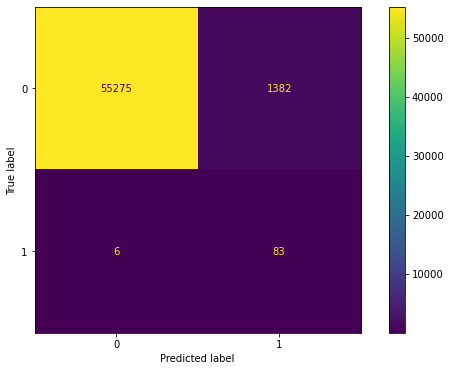

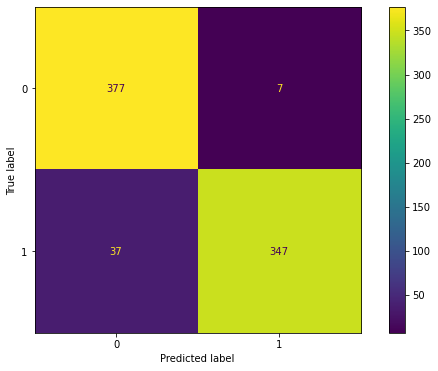

In [102]:
eval_metric(smote_log_model, X_under, y_under, X_test, y_test)

In [103]:
X = df.drop(columns="class") 
y = df["class"]

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [105]:
scaler = RobustScaler()

In [106]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [107]:
over = SMOTE()
X_over, y_over = over.fit_resample(X_train, y_train)  

In [108]:
X_over.shape

(453192, 31)

In [109]:
y_over.value_counts() 

0    226596
1    226596
Name: class, dtype: int64

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56657
           1       0.06      0.93      0.11        89

    accuracy                           0.98     56746
   macro avg       0.53      0.95      0.55     56746
weighted avg       1.00      0.98      0.99     56746




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.90      0.98      0.94    226596
           1       0.97      0.89      0.93    226596

    accuracy                           0.93    453192
   macro avg       0.94      0.93      0.93    453192
weighted avg       0.94      0.93      0.93    453192



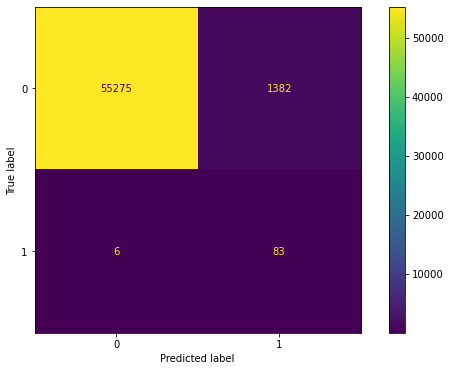

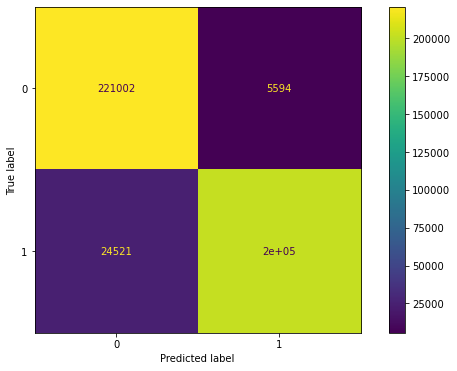

In [110]:
eval_metric(smote_log_model, X_over, y_over, X_test, y_test)

***i. Train-Test Split (Again)***

In [111]:
X = df.drop(columns="class") 
y = df["class"]

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [113]:
df["class"].value_counts()

0    283253
1       473
Name: class, dtype: int64

In [114]:
# Diğer bir yaklaşım istediğimiz bir sayıya da over veya under yapabiliyoruz
over = SMOTE(sampling_strategy={1: 2500})               
under = RandomUnderSampler(sampling_strategy={0: 55000})    

In [115]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train, y_train)

In [116]:
y_train.value_counts()   # Önceki hali

0    226596
1       384
Name: class, dtype: int64

In [117]:
y_resampled_over.value_counts()   

0    226596
1      2500
Name: class, dtype: int64

In [118]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train, y_train) #X_resampled_over, y_resampled_over

In [119]:
y_resampled_under.value_counts()  # White 2500 e inmiş

0    55000
1      384
Name: class, dtype: int64

In [120]:

steps = [('o', over), ('u', under)]

# create a pipeline that will automatically apply over and under
# sampling in order to steps that we created.
pipeline = imbpipeline(steps=steps)

# we will create new data over X_train and y_train.
# We simply delete some of our samples if its race "white" and we add synthetic samples to "hispanics".
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

# Bunu modelde nasıl kullanacağız bakalım

In [121]:
y_resampled.value_counts()

0    55000
1     2500
Name: class, dtype: int64

***ii. Model Training***

In [122]:
operations = [("scaler", RobustScaler()),('o', over), ('u', under), 
              ("log", LogisticRegression(max_iter=10000,random_state=101))] 


In [123]:
smote_pipeline = imbpipeline(steps=operations)

In [124]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('o', SMOTE(sampling_strategy={1: 2500})),
                ('u', RandomUnderSampler(sampling_strategy={0: 55000})),
                ('log', LogisticRegression(max_iter=10000, random_state=101))])

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56657
           1       0.63      0.83      0.71        89

    accuracy                           1.00     56746
   macro avg       0.81      0.92      0.86     56746
weighted avg       1.00      1.00      1.00     56746




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226596
           1       0.65      0.84      0.73       384

    accuracy                           1.00    226980
   macro avg       0.83      0.92      0.87    226980
weighted avg       1.00      1.00      1.00    226980



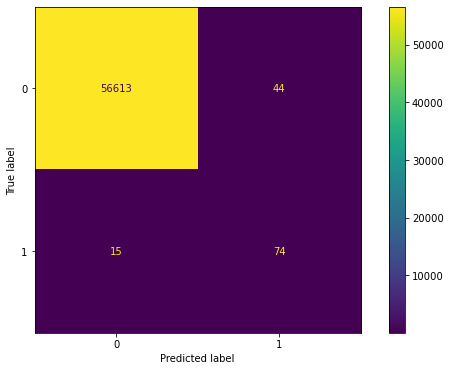

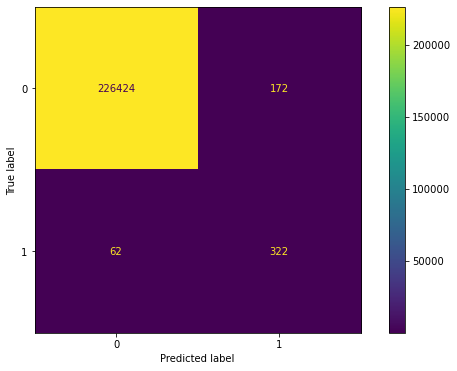

In [125]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)
# Diğerlerine göre sonucun çok yüksek olduğu söylenemez
# John hoca: Yaptığım incelemelerde bu yöntemin performansı iyi değildi. class_weight='balanced' performansı daha iyi

In [126]:
model = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ["recall","precision","f1"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_recall      0.828
test_precision   0.664
test_f1          0.736
dtype: float64

***Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

In [127]:
y_pred = smote_pipeline.predict(X_test)
y_pred_proba = smote_pipeline.predict_proba(X_test)

In [128]:
precisions, recalls, thresholds = precision_recall_curve(y_pred, y_pred_proba[:,1])

In [129]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.5026414871751428

In [130]:
def cv_kfold(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)       # Index no'ları her işlemden sonra sıfırlaması için.
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [131]:
cv_kfold(10, smote_pipeline, pd.DataFrame(X_train), y_train, 0.51)

Accuracy      99.90%  std 0.02%
Precision-1   66.49%  std 4.98%
Recall-1      83.34%  std 5.34%
F1_score-1    73.72%  std 3.13%


***iv. Plot Precision and Recall Curve***


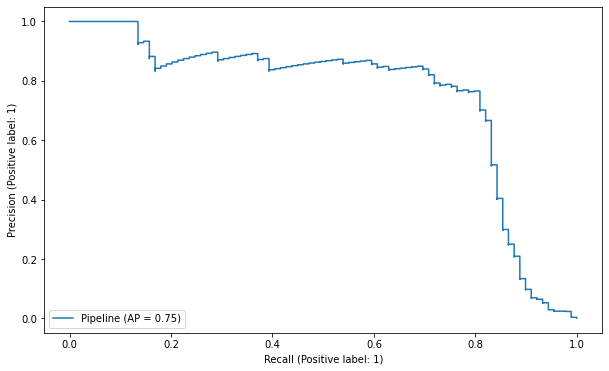

In [132]:
plot_precision_recall_curve(smote_pipeline, X_test, y_test)

In [133]:
log_smote_model_accuracy = accuracy_score(y_test, y_pred)
log_smote_model_f1 = f1_score(y_test, y_pred)
log_smote_model_recall = recall_score(y_test,y_pred)
log_smote_model_auc = roc_auc_score(y_test, y_pred)

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [134]:
train_ds = Dataset(X_train, label=y_train, cat_features=[])
test_ds = Dataset(X_test, label=y_test, cat_features=[])

In [135]:
from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, smote_pipeline)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 28 seconds


Accordion(children=(VBox(children=(HTML(value='\n            <h1 id="summary_MJV5G2H7EJVY8RUXFLIDPL09P">Model …

In [137]:
log_smote_model_accuracy = accuracy_score(y_test, y_pred)
log_smote_model_f1 = f1_score(y_test, y_pred)
log_smote_model_recall = recall_score(y_test,y_pred)
log_smote_model_roc_auc = roc_auc_score(y_test, y_pred)

### Random Forest Classifier with Unbalanced Data Techniques

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iii. Plot Precision and Recall Curve*
   

In [138]:
X = df.drop(columns="class")
y = df['class']

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***i. Model Training***

In [140]:
operations = [("scaler", RobustScaler()), ("RF_model", RandomForestClassifier(random_state=42))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('RF_model', RandomForestClassifier(random_state=42))])

***ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.71      0.82        90

    accuracy                           1.00     56746
   macro avg       0.98      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226597
           1       1.00      1.00      1.00       383

    accuracy                           1.00    226980
   macro avg       1.00      1.00      1.00    226980
weighted avg       1.00      1.00      1.00    226980



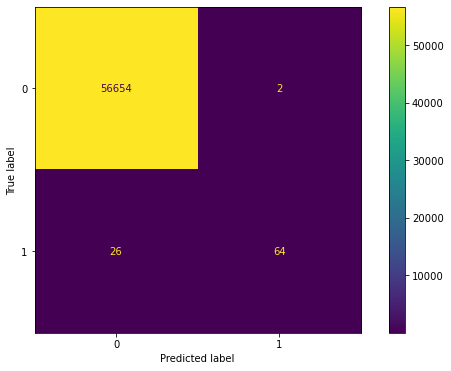

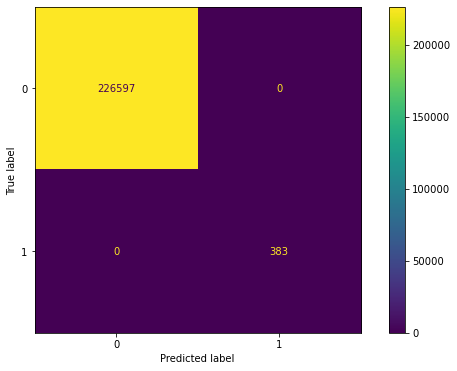

In [141]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

In [ ]:
operations = [("scaler", RobustScaler()), ("RF_model", RandomForestClassifier(random_state=42))]

model = Pipeline(steps=operations)


scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], 
                        cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))


In [ ]:
df_scores.mean()[2:]

**Applying StratifiedKFold**

In [143]:
y_pred = pipe_model.predict(X_test)
y_pred_proba = pipe_model.predict_proba(X_test)

In [144]:
precisions, recalls, thresholds = precision_recall_curve(y_pred, y_pred_proba[:,1])

In [145]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.55

In [146]:
cv_kfold(10, pipe_model, pd.DataFrame(X_train), y_train, 0.55)

Accuracy      99.95%  std 0.01%
Precision-1   94.47%  std 4.44%
Recall-1      77.30%  std 5.68%
F1_score-1    84.87%  std 3.99%


***iv. Plot Precision and Recall Curve***


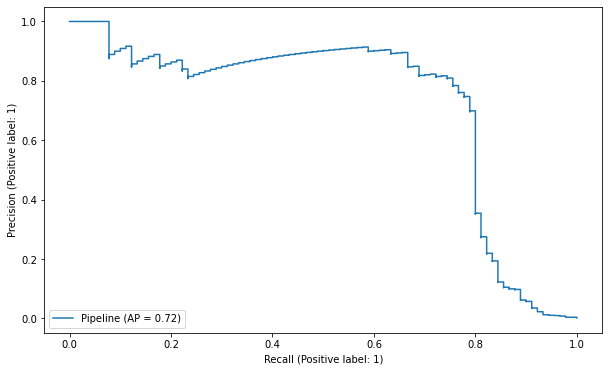

In [147]:
plot_precision_recall_curve(smote_pipeline, X_test, y_test)

***i. Train-Test Split (Again)***

In [148]:
X = df.drop(columns="class") 
y = df["class"]

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [150]:
df["class"].value_counts()

0    283253
1       473
Name: class, dtype: int64

In [151]:
# Diğer bir yaklaşım istediğimiz bir sayıya da over veya under yapabiliyoruz
over = SMOTE(sampling_strategy={1: 2500})               
under = RandomUnderSampler(sampling_strategy={0: 55000})    

In [152]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train, y_train)

In [153]:
y_train.value_counts()   # Önceki hali

0    226596
1       384
Name: class, dtype: int64

In [154]:
y_resampled_over.value_counts()   

0    226596
1      2500
Name: class, dtype: int64

In [155]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train, y_train) #X_resampled_over, y_resampled_over

In [156]:
y_resampled_under.value_counts()  # White 2500 e inmiş

0    55000
1      384
Name: class, dtype: int64

In [157]:

steps = [('o', over), ('u', under)]

# create a pipeline that will automatically apply over and under
# sampling in order to steps that we created.
pipeline = imbpipeline(steps=steps)

# we will create new data over X_train and y_train.
# We simply delete some of our samples if its race "white" and we add synthetic samples to "hispanics".
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

# Bunu modelde nasıl kullanacağız bakalım

In [158]:
y_resampled.value_counts()

0    55000
1     2500
Name: class, dtype: int64

***ii. Model Training***

In [159]:
operations = [("scaler", RobustScaler()),('o', over), ('u', under), 
              ("rf_model", RandomForestClassifier(random_state=101))] 


In [160]:
smote_pipeline = imbpipeline(steps=operations)

In [161]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('o', SMOTE(sampling_strategy={1: 2500})),
                ('u', RandomUnderSampler(sampling_strategy={0: 55000})),
                ('rf_model', RandomForestClassifier(random_state=101))])

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56657
           1       0.89      0.80      0.84        89

    accuracy                           1.00     56746
   macro avg       0.94      0.90      0.92     56746
weighted avg       1.00      1.00      1.00     56746




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226596
           1       0.92      1.00      0.96       384

    accuracy                           1.00    226980
   macro avg       0.96      1.00      0.98    226980
weighted avg       1.00      1.00      1.00    226980



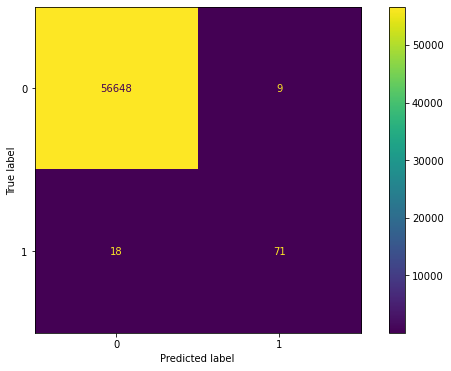

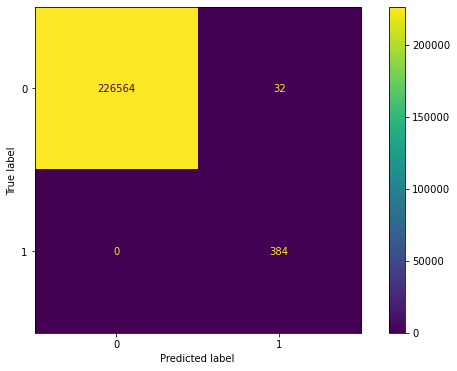

In [162]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)
# Diğerlerine göre sonucun çok yüksek olduğu söylenemez
# John hoca: Yaptığım incelemelerde bu yöntemin performansı iyi değildi. class_weight='balanced' performansı daha iyi

In [163]:
rf_smote_model_accuracy = accuracy_score(y_test, y_pred)
rf_smote_model_f1 = f1_score(y_test, y_pred)
rf_smote_model_recall = recall_score(y_test,y_pred)
rf_smote_model_roc_auc = roc_auc_score(y_test, y_pred)

In [164]:
model = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ["recall","precision","f1"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_recall      0.829
test_precision   0.815
test_f1          0.822
dtype: float64

***Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

In [165]:
y_pred = smote_pipeline.predict(X_test)
y_pred_proba = smote_pipeline.predict_proba(X_test)

In [166]:
precisions, recalls, thresholds = precision_recall_curve(y_pred, y_pred_proba[:,1])

In [167]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.54

In [168]:
cv_kfold(10, smote_pipeline, pd.DataFrame(X_train), y_train, 0.51)

Accuracy      99.94%  std 0.01%
Precision-1   84.50%  std 5.13%
Recall-1      83.07%  std 4.83%
F1_score-1    83.64%  std 3.61%


***iv. Plot Precision and Recall Curve***


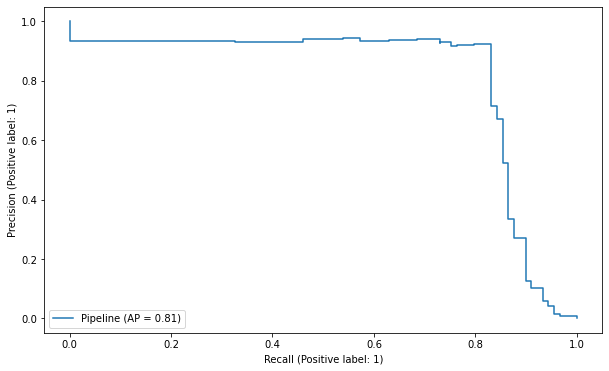

In [169]:
plot_precision_recall_curve(smote_pipeline, X_test, y_test)

In [170]:
param_grid = {'rf_model__max_depth':[2, 3, 4],
             'rf_model__min_samples_split':[2, 3, 4],
             'rf_model__min_samples_leaf': [2, 3, 4]} 

In [171]:
operations = [("scaler", RobustScaler()),('o', over), ('u', under), 
              ("rf_model", RandomForestClassifier(random_state=101))] 


In [172]:
smote_grid_pipe = imbpipeline(steps=operations)

rf_smote_grid_model = GridSearchCV(smote_grid_pipe, param_grid, scoring = "recall", n_jobs = -1, verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [173]:
rf_smote_grid_model.best_params_

{'rf_model__max_depth': 4,
 'rf_model__min_samples_leaf': 2,
 'rf_model__min_samples_split': 2}

In [174]:
rf_smote_grid_model.best_estimator_

Pipeline(steps=[('scaler', RobustScaler()),
                ('o', SMOTE(sampling_strategy={1: 2500})),
                ('u', RandomUnderSampler(sampling_strategy={0: 55000})),
                ('rf_model',
                 RandomForestClassifier(max_depth=4, min_samples_leaf=2,
                                        random_state=101))])

In [175]:
rf_smote_grid_model.best_score_

0.8256664388243337

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56657
           1       0.79      0.79      0.79        89

    accuracy                           1.00     56746
   macro avg       0.89      0.89      0.89     56746
weighted avg       1.00      1.00      1.00     56746




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226596
           1       0.81      0.84      0.82       384

    accuracy                           1.00    226980
   macro avg       0.91      0.92      0.91    226980
weighted avg       1.00      1.00      1.00    226980



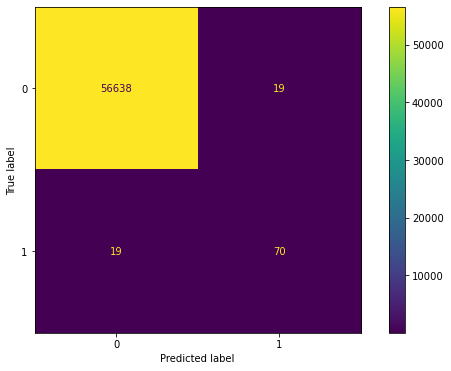

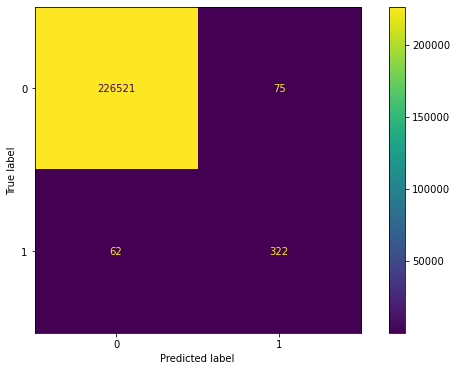

In [176]:
eval_metric(rf_smote_grid_model, X_train, y_train, X_test, y_test)

In [177]:
rf_smote_model_grid_accuracy = accuracy_score(y_test, y_pred)
rf_smote_model_grid_f1 = f1_score(y_test, y_pred)
rf_smote_model_grid_recall = recall_score(y_test,y_pred)
rf_smote_model_grid_roc_auc = roc_auc_score(y_test, y_pred)

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [178]:
train_ds = Dataset(X_train, label=y_train, cat_features=[])
test_ds = Dataset(X_test, label=y_test, cat_features=[])

In [179]:
from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, rf_smote_grid_model)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

deepchecks - WARNING - Could not find built-in feature importance on the model, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 49 seconds


Accordion(children=(VBox(children=(HTML(value='\n            <h1 id="summary_S08RSD92H0VXWVZJ09QIM9SFM">Model …

### XGBoost Classifier with Unbalanced Data Techniques

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iii. Plot Precision and Recall Curve*
   

In [180]:
X = df.drop(columns="class")
y = df['class']

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***i. Model Training***

In [182]:
operations = [("scaler", RobustScaler()), ("xgb_model", XGBClassifier(random_state=42))]

xgb_pipe_model = Pipeline(steps=operations)

xgb_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('xgb_model', XGBClassifier(random_state=42))])

***ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.95      0.69      0.80        90

    accuracy                           1.00     56746
   macro avg       0.98      0.84      0.90     56746
weighted avg       1.00      1.00      1.00     56746




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226597
           1       0.97      0.84      0.90       383

    accuracy                           1.00    226980
   macro avg       0.98      0.92      0.95    226980
weighted avg       1.00      1.00      1.00    226980



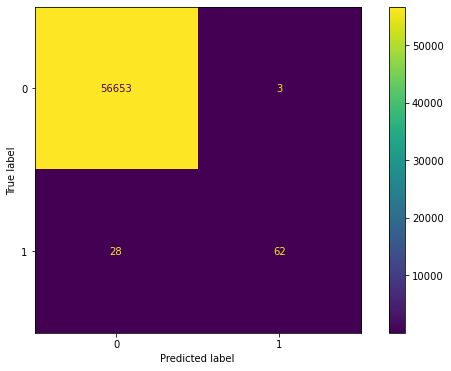

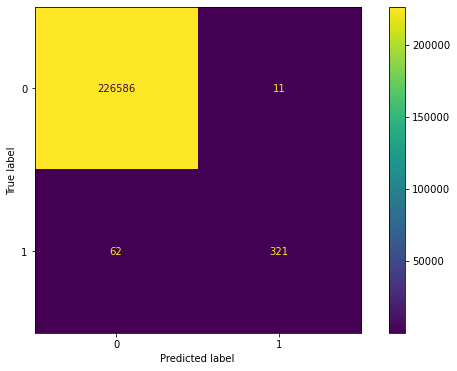

In [183]:
eval_metric(xgb_pipe_model, X_train, y_train, X_test, y_test)

In [184]:
operations = [("scaler", RobustScaler()), ("xgb_model", XGBClassifier(random_state=42))]

model = Pipeline(steps=operations)


scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], 
                        cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))


In [185]:
df_scores.mean()[2:]

test_accuracy    1.000
test_precision   0.937
test_recall      0.794
test_f1          0.856
dtype: float64

**Applying StratifiedKFold**

In [186]:
y_pred = xgb_pipe_model.predict(X_test)
y_pred_proba = xgb_pipe_model.predict_proba(X_test)

In [187]:
precisions, recalls, thresholds = precision_recall_curve(y_pred, y_pred_proba[:,1])

In [188]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.51769894

In [189]:
cv_kfold(10, xgb_pipe_model, pd.DataFrame(X_train), y_train, 0.51)

Accuracy      99.96%  std 0.01%
Precision-1   93.49%  std 6.31%
Recall-1      80.43%  std 4.15%
F1_score-1    86.32%  std 3.91%


***iv. Plot Precision and Recall Curve***


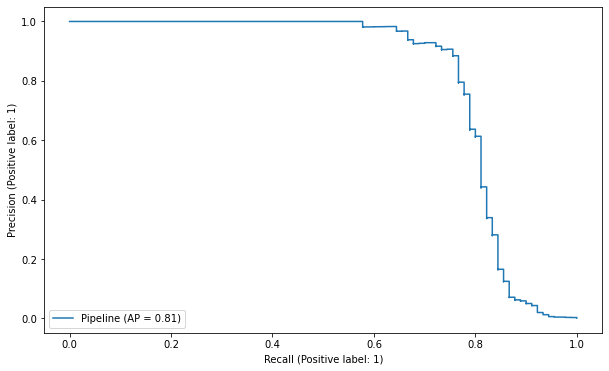

In [190]:
plot_precision_recall_curve(xgb_pipe_model, X_test, y_test)

***i. Train-Test Split (Again)***

In [191]:
X = df.drop(columns="class") 
y = df["class"]

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [193]:
df["class"].value_counts()

0    283253
1       473
Name: class, dtype: int64

In [194]:
# Diğer bir yaklaşım istediğimiz bir sayıya da over veya under yapabiliyoruz
over = SMOTE(sampling_strategy={1: 2500})               
under = RandomUnderSampler(sampling_strategy={0: 55000})    

In [195]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train, y_train)

In [196]:
y_train.value_counts()   # Önceki hali

0    226596
1       384
Name: class, dtype: int64

In [197]:
y_resampled_over.value_counts()   

0    226596
1      2500
Name: class, dtype: int64

In [198]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train, y_train) #X_resampled_over, y_resampled_over

In [199]:
y_resampled_under.value_counts()  # White 2500 e inmiş

0    55000
1      384
Name: class, dtype: int64

In [200]:

steps = [('o', over), ('u', under)]

# create a pipeline that will automatically apply over and under
# sampling in order to steps that we created.
pipeline = imbpipeline(steps=steps)

# we will create new data over X_train and y_train.
# We simply delete some of our samples if its race "white" and we add synthetic samples to "hispanics".
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

# Bunu modelde nasıl kullanacağız bakalım

In [201]:
y_resampled.value_counts()

0    55000
1     2500
Name: class, dtype: int64

***ii. Model Training***

In [202]:
operations = [("scaler", RobustScaler()),('o', over), ('u', under), 
              ("xgb_smote_model", XGBClassifier(random_state=101))] 


In [203]:
smote_pipeline = imbpipeline(steps=operations)

In [204]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('o', SMOTE(sampling_strategy={1: 2500})),
                ('u', RandomUnderSampler(sampling_strategy={0: 55000})),
                ('xgb_smote_model', XGBClassifier(random_state=101))])

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56657
           1       0.65      0.83      0.73        89

    accuracy                           1.00     56746
   macro avg       0.82      0.92      0.86     56746
weighted avg       1.00      1.00      1.00     56746




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226596
           1       0.70      0.88      0.78       384

    accuracy                           1.00    226980
   macro avg       0.85      0.94      0.89    226980
weighted avg       1.00      1.00      1.00    226980



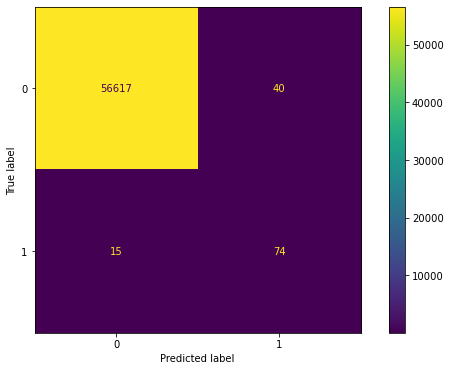

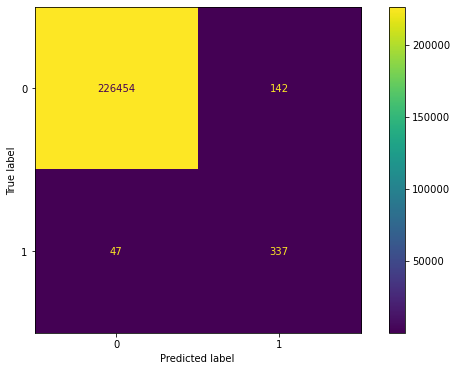

In [205]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)
# Diğerlerine göre sonucun çok yüksek olduğu söylenemez
# John hoca: Yaptığım incelemelerde bu yöntemin performansı iyi değildi. class_weight='balanced' performansı daha iyi

In [206]:
xgb_smote_model_accuracy = accuracy_score(y_test, y_pred)
xgb_smote_model_f1 = f1_score(y_test, y_pred)
xgb_smote_model_recall = recall_score(y_test,y_pred)
xgb_smote_model_roc_auc = roc_auc_score(y_test, y_pred)

In [207]:
model = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ["recall","precision","f1"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_recall      0.836
test_precision   0.728
test_f1          0.777
dtype: float64

***Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

In [208]:
y_pred = smote_pipeline.predict(X_test)
y_pred_proba = smote_pipeline.predict_proba(X_test)

In [209]:
precisions, recalls, thresholds = precision_recall_curve(y_pred, y_pred_proba[:,1])

In [210]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.50117207

In [211]:
cv_kfold(10, smote_pipeline, pd.DataFrame(X_train), y_train, 0.51)

Accuracy      99.92%  std 0.02%
Precision-1   72.98%  std 6.24%
Recall-1      83.33%  std 4.81%
F1_score-1    77.59%  std 3.78%


***iv. Plot Precision and Recall Curve***


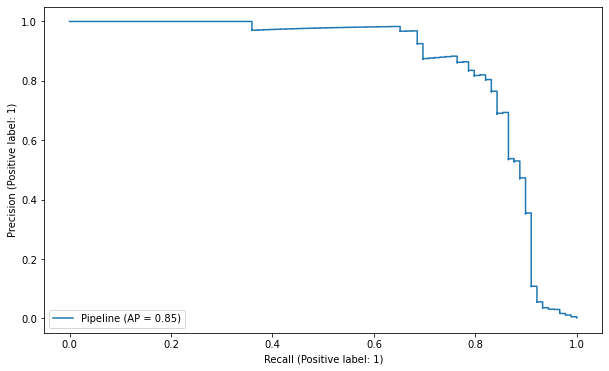

In [212]:
plot_precision_recall_curve(smote_pipeline, X_test, y_test)

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [213]:
train_ds = Dataset(X_train, label=y_train, cat_features=[])
test_ds = Dataset(X_test, label=y_test, cat_features=[])

In [214]:
from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, smote_pipeline)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 26 seconds


Accordion(children=(VBox(children=(HTML(value='\n            <h1 id="summary_MZPO1C42MZQX49KW5GMKQ5B5S">Model …

In [215]:
param_grid = {'xgb_model__max_depth':[3,4,5], 
              "xgb_model__learning_rate": [0.1, 0.2],
              "xgb_model__colsample_bytree":[0.5,0.7, 1]}

In [216]:
operations = [("scaler", RobustScaler()),('o', over), ('u', under), 
              ("xgb_model", XGBClassifier(random_state=101))] 


In [217]:
smote_grid_pipe = imbpipeline(steps=operations)

xgb_smote_grid_model = GridSearchCV(smote_grid_pipe, param_grid, scoring = "recall", n_jobs = -1, verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [218]:
xgb_smote_grid_model.best_params_

{'xgb_model__colsample_bytree': 0.7,
 'xgb_model__learning_rate': 0.1,
 'xgb_model__max_depth': 3}

In [219]:
xgb_smote_grid_model.best_estimator_

Pipeline(steps=[('scaler', RobustScaler()),
                ('o', SMOTE(sampling_strategy={1: 2500})),
                ('u', RandomUnderSampler(sampling_strategy={0: 55000})),
                ('xgb_model',
                 XGBClassifier(colsample_bytree=0.7, random_state=101))])

In [220]:
xgb_smote_grid_model.best_score_

0.8334586466165413

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56657
           1       0.76      0.83      0.80        89

    accuracy                           1.00     56746
   macro avg       0.88      0.92      0.90     56746
weighted avg       1.00      1.00      1.00     56746




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226596
           1       0.78      0.86      0.82       384

    accuracy                           1.00    226980
   macro avg       0.89      0.93      0.91    226980
weighted avg       1.00      1.00      1.00    226980



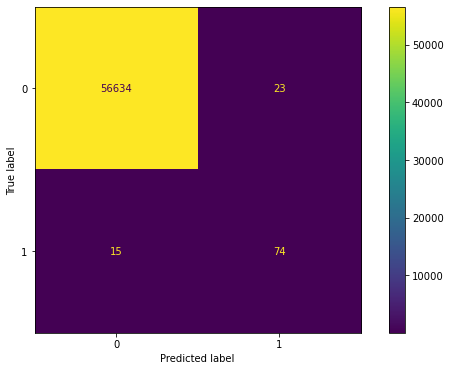

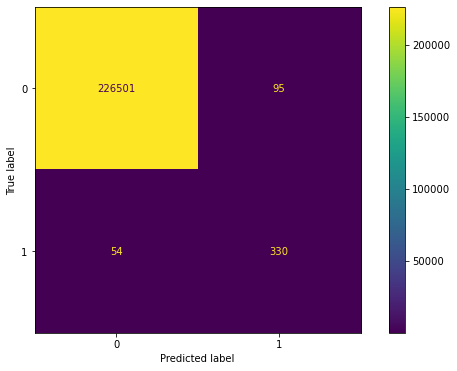

In [221]:
eval_metric(xgb_smote_grid_model, X_train, y_train, X_test, y_test)

***iii. Plot Precision and Recall Curve***


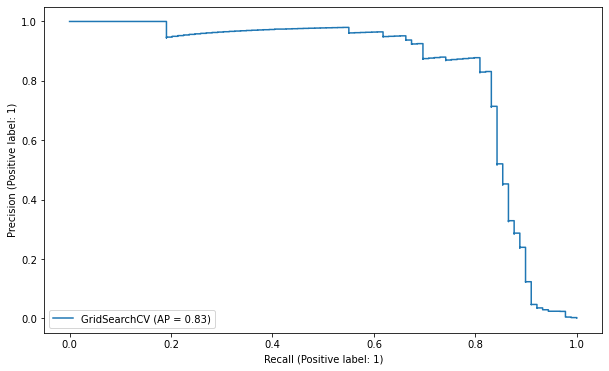

In [222]:
plot_precision_recall_curve(xgb_smote_grid_model, X_test, y_test)

In [223]:
## final model

In [224]:
operations = [("scaler", RobustScaler()),('o', over), ('u', under), 
              ("xgb_model", XGBClassifier(random_state=101))] 

xgb_smote_grid_pipe = imbpipeline(steps=operations)
xgb_smote_grid_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('o', SMOTE(sampling_strategy={1: 2500})),
                ('u', RandomUnderSampler(sampling_strategy={0: 55000})),
                ('xgb_model', XGBClassifier(random_state=101))])

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56657
           1       0.69      0.81      0.74        89

    accuracy                           1.00     56746
   macro avg       0.84      0.90      0.87     56746
weighted avg       1.00      1.00      1.00     56746




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226596
           1       0.76      0.86      0.81       384

    accuracy                           1.00    226980
   macro avg       0.88      0.93      0.90    226980
weighted avg       1.00      1.00      1.00    226980



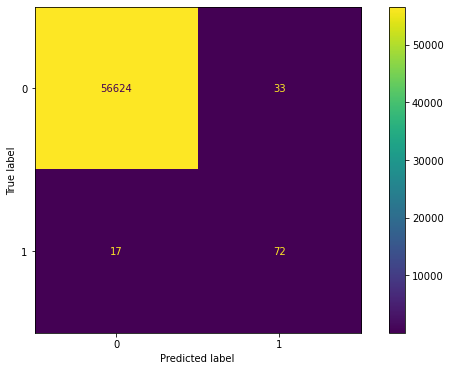

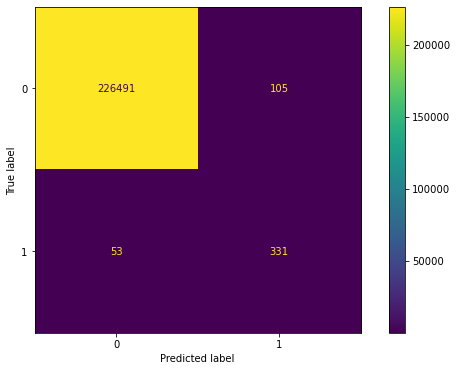

In [225]:
eval_metric(xgb_smote_grid_pipe, X_train, y_train, X_test, y_test)

In [226]:
xgb_smote_model_grid_accuracy = accuracy_score(y_test, y_pred)
xgb_smote_model_grid_f1 = f1_score(y_test, y_pred)
xgb_smote_model_grid_recall = recall_score(y_test,y_pred)
xgb_smote_model_grid_roc_auc = roc_auc_score(y_test, y_pred)

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [227]:
train_ds = Dataset(X_train, label=y_train, cat_features=[])
test_ds = Dataset(X_test, label=y_test, cat_features=[])

In [228]:
from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, xgb_smote_grid_pipe)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 61 seconds


Accordion(children=(VBox(children=(HTML(value='\n            <h1 id="summary_GT7EXA64J686FRJRW14JWH58Y">Model …

### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

In [229]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

***ii. Define Model***

In [230]:
X = df.drop(columns="class")
y = df["class"]

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [232]:
scaler = RobustScaler()

In [233]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [234]:
seed = 101

In [235]:
tf.random.set_seed(seed)
model = Sequential()

model.add(Dense(45, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001) # Default 0.001 already
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [236]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 45)                1440      
                                                                 
 dense_1 (Dense)             (None, 32)                1472      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3,585
Trainable params: 3,585
Non-trainable params: 0
_________________________________________________________________


***iv. Fit Model***

In [237]:
model.fit(X_train, y_train, validation_split=0.1, batch_size=128, epochs=100)

Epoch 1/100
1596/1596 [==============================] - 3s 1ms/step - loss: 0.0354 - recall: 0.6163 - val_loss: 0.0036 - val_recall: 0.7353
Epoch 2/100
1596/1596 [==============================] - 2s 1ms/step - loss: 0.0032 - recall: 0.7791 - val_loss: 0.0038 - val_recall: 0.7353
Epoch 3/100
1596/1596 [==============================] - 2s 1ms/step - loss: 0.0027 - recall: 0.8023 - val_loss: 0.0039 - val_recall: 0.6765
Epoch 4/100
1596/1596 [==============================] - 2s 1ms/step - loss: 0.0024 - recall: 0.7733 - val_loss: 0.0034 - val_recall: 0.7647
Epoch 5/100
1596/1596 [==============================] - 3s 2ms/step - loss: 0.0023 - recall: 0.7674 - val_loss: 0.0038 - val_recall: 0.6765
Epoch 6/100
1596/1596 [==============================] - 3s 2ms/step - loss: 0.0022 - recall: 0.7733 - val_loss: 0.0037 - val_recall: 0.7059
Epoch 7/100
1596/1596 [==============================] - 2s 1ms/step - loss: 0.0021 - recall: 0.7616 - val_loss: 0.0036 - val_recall: 0.7059
Epoch 8/100
1

1596/1596 [==============================] - 3s 2ms/step - loss: 4.2421e-04 - recall: 0.9651 - val_loss: 0.0123 - val_recall: 0.7647
Epoch 58/100
1596/1596 [==============================] - 3s 2ms/step - loss: 3.7726e-04 - recall: 0.9622 - val_loss: 0.0126 - val_recall: 0.7647
Epoch 59/100
1596/1596 [==============================] - 3s 2ms/step - loss: 2.2384e-04 - recall: 0.9767 - val_loss: 0.0140 - val_recall: 0.7647
Epoch 60/100
1596/1596 [==============================] - 3s 2ms/step - loss: 4.6539e-04 - recall: 0.9506 - val_loss: 0.0140 - val_recall: 0.7647
Epoch 61/100
1596/1596 [==============================] - 4s 2ms/step - loss: 2.4189e-04 - recall: 0.9651 - val_loss: 0.0143 - val_recall: 0.7647
Epoch 62/100
1596/1596 [==============================] - 3s 2ms/step - loss: 3.6693e-04 - recall: 0.9535 - val_loss: 0.0170 - val_recall: 0.7353
Epoch 63/100
1596/1596 [==============================] - 2s 1ms/step - loss: 3.0814e-04 - recall: 0.9738 - val_loss: 0.0167 - val_recall

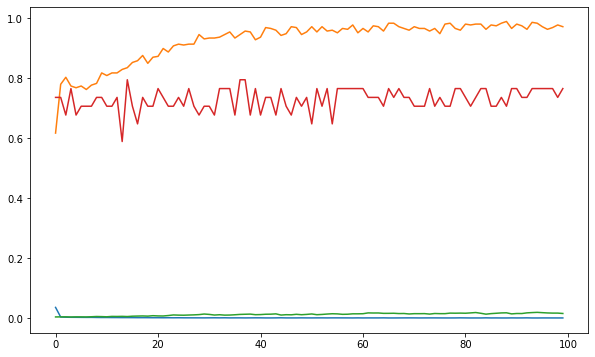

In [238]:
loss_df = pd.DataFrame(model.history.history)
plt.plot(loss_df);

In [239]:
y_pred = model.predict(X_test) > 0.5

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1774/1774 [==============================] - 3s 2ms/step
[[56633    18]
 [   25    70]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.80      0.74      0.77        95

    accuracy                           1.00     56746
   macro avg       0.90      0.87      0.88     56746
weighted avg       1.00      1.00      1.00     56746



In [240]:
tf.random.set_seed(seed)
model = Sequential()

model.add(Dense(45, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001) # Default 0.001 already
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [241]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight("balanced",
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.5008340614822464, 1: 300.23809523809524}

In [242]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 15, restore_best_weights = True)

In [243]:
model.fit(X_train, y_train, validation_split=0.1, batch_size=128, epochs=100, callbacks=[early_stop], class_weight=class_weights)

Epoch 1/100
1596/1596 [==============================] - 4s 2ms/step - loss: 0.3070 - recall: 0.8430 - val_loss: 0.1640 - val_recall: 0.8824
Epoch 2/100
1596/1596 [==============================] - 3s 2ms/step - loss: 0.1527 - recall: 0.9244 - val_loss: 0.1736 - val_recall: 0.8824
Epoch 3/100
1596/1596 [==============================] - 2s 2ms/step - loss: 0.1435 - recall: 0.9302 - val_loss: 0.1100 - val_recall: 0.8529
Epoch 4/100
1596/1596 [==============================] - 4s 2ms/step - loss: 0.1107 - recall: 0.9564 - val_loss: 0.0790 - val_recall: 0.8529
Epoch 5/100
1596/1596 [==============================] - 3s 2ms/step - loss: 0.0983 - recall: 0.9448 - val_loss: 0.0962 - val_recall: 0.8824
Epoch 6/100
1596/1596 [==============================] - 2s 1ms/step - loss: 0.0894 - recall: 0.9593 - val_loss: 0.1322 - val_recall: 0.8529
Epoch 7/100
1596/1596 [==============================] - 2s 1ms/step - loss: 0.0756 - recall: 0.9622 - val_loss: 0.0612 - val_recall: 0.8235
Epoch 8/100
1

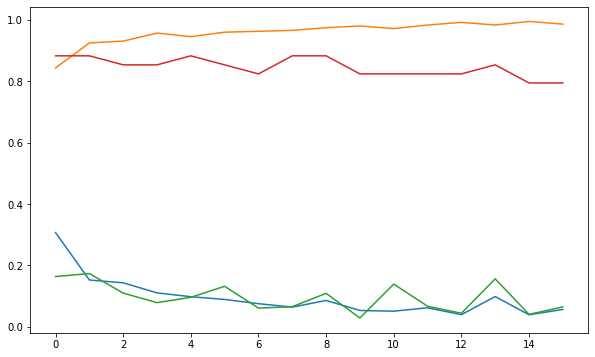

In [244]:
loss_df = pd.DataFrame(model.history.history)
plt.plot(loss_df);

In [245]:
y_pred = model.predict(X_test) > 0.5

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1774/1774 [==============================] - 3s 2ms/step
[[55026  1625]
 [   12    83]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56651
           1       0.05      0.87      0.09        95

    accuracy                           0.97     56746
   macro avg       0.52      0.92      0.54     56746
weighted avg       1.00      0.97      0.98     56746



In [246]:
ann_smote_model_grid_accuracy = accuracy_score(y_test, y_pred)
ann_smote_model_grid_f1 = f1_score(y_test, y_pred)
ann_smote_model_grid_recall = recall_score(y_test,y_pred)
ann_smote_model_grid_roc_auc = roc_auc_score(y_test, y_pred)

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [248]:
train_ds = Dataset(X_train, label=y_train, cat_features=[])
test_ds = Dataset(X_test, label=y_test, cat_features=[])

In [249]:
from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, model)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

1774/1774 [==============================] - 3s 2ms/step


1/1 [==============================] - 0s 16ms/step


deepchecks - WARNING - Could not find built-in feature importance on the model, using permutation feature importance calculation instead


313/313 [==============================] - 0s 1ms/step


deepchecks - WARNING - Features importance was not calculated:
Skipping permutation importance calculation: calculation was projected to finish in 617 seconds, but timeout was configured to 120 seconds


32/32 [==============================] - 0s 2ms/step


Accordion(children=(VBox(children=(HTML(value='\n            <h1 id="summary_6IF2K2675RXEYS3HMWPJ1BGGL">Model …

## Comparing

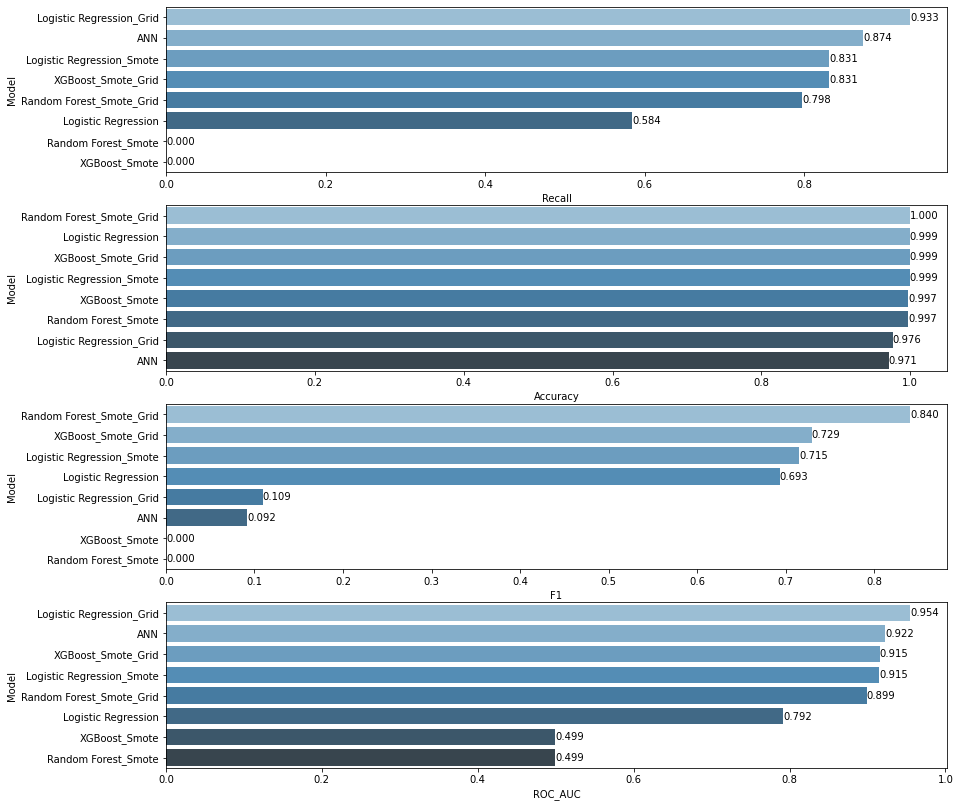

In [251]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "Logistic Regression_Grid", "Logistic Regression_Smote", "Random Forest_Smote", "Random Forest_Smote_Grid", "XGBoost_Smote", "XGBoost_Smote_Grid", "ANN"],
                        "F1": [log_model_f1, log_grid_model_f1, log_smote_model_f1, rf_smote_model_f1, rf_smote_model_grid_f1, xgb_smote_model_f1, xgb_smote_model_grid_f1, ann_smote_model_grid_f1],
                        "Recall": [log_model_recall, log_grid_model_recall, log_smote_model_recall, rf_smote_model_recall, rf_smote_model_grid_recall, xgb_smote_model_recall, xgb_smote_model_grid_recall, ann_smote_model_grid_recall],
                        "ROC_AUC": [log_model_auc, log_grid_model_auc, log_smote_model_auc, rf_smote_model_roc_auc, rf_smote_model_grid_roc_auc, xgb_smote_model_roc_auc, xgb_smote_model_grid_roc_auc, ann_smote_model_grid_roc_auc],
                        "Accuracy":[log_model_accuracy, log_grid_model_accuracy, log_smote_model_accuracy, rf_smote_model_accuracy, rf_smote_model_grid_accuracy, xgb_smote_model_accuracy, xgb_smote_model_grid_accuracy, ann_smote_model_grid_accuracy]
                       })

def labels(ax):
    ax.bar_label(ax.containers[0],fmt="%.3f")
    
plt.figure(figsize=(14,14))
plt.subplot(411)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(412)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(413)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(414)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

In [252]:
## FEATURE SELECTİON

X = df.drop(columns=["class", "V20", "V10", "V28", "V21", "V27", "V5", "V8", "V6", "V3", "time", "V4", "V1", "V25"])
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [253]:
over = SMOTE(sampling_strategy={1: 2500})               
under = RandomUnderSampler(sampling_strategy={0: 55000})    

In [254]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train, y_train)

In [255]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train, y_train) #X_resampled_over, y_resampled_over

In [256]:
steps = [('o', over), ('u', under)]

# create a pipeline that will automatically apply over and under
# sampling in order to steps that we created.
pipeline = imbpipeline(steps=steps)

# we will create new data over X_train and y_train.
# We simply delete some of our samples if its race "white" and we add synthetic samples to "hispanics".
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)


In [257]:
operations = [("scaler", RobustScaler()),('o', over), ('u', under), 
              ("xgb_smote_grid_feat_model", XGBClassifier(learning_rate=0.2, random_state=101))] 


In [258]:
smote_feat_pipeline = imbpipeline(steps=operations)

In [259]:
smote_feat_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('o', SMOTE(sampling_strategy={1: 2500})),
                ('u', RandomUnderSampler(sampling_strategy={0: 55000})),
                ('xgb_smote_grid_feat_model',
                 XGBClassifier(learning_rate=0.2, random_state=101))])

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.68      0.79      0.73        95

    accuracy                           1.00     56746
   macro avg       0.84      0.89      0.87     56746
weighted avg       1.00      1.00      1.00     56746




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       0.75      0.91      0.82       378

    accuracy                           1.00    226980
   macro avg       0.88      0.95      0.91    226980
weighted avg       1.00      1.00      1.00    226980



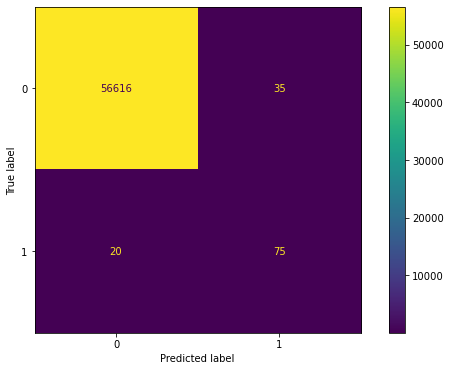

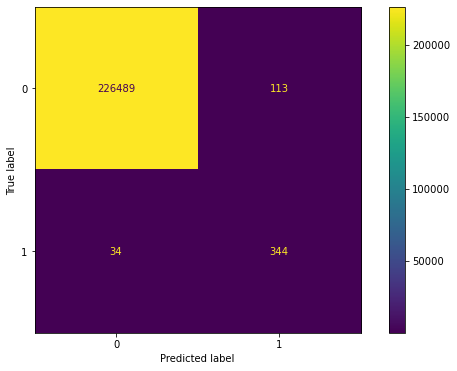

In [260]:
eval_metric(smote_feat_pipeline, X_train, y_train, X_test, y_test)

## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to a proper IDE and create your web app with Streamlit API.

### Save and Export the Best Model


In [261]:
# After we decided final model as xgboost_smote_grid_model we assesed that it could be better to implement feature selection
# in order to get higher scores. And then we tried feature selection and we get worse scores than the previous one. So we 
# decided to proceed with xgboost_smote_grid_model as final model.

In [262]:
## FINAL MODEL

X = df.drop(columns="class")
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [263]:
over = SMOTE(sampling_strategy={1: 2500})               
under = RandomUnderSampler(sampling_strategy={0: 55000})    

In [264]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train, y_train)

In [265]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train, y_train) #X_resampled_over, y_resampled_over

In [266]:
steps = [('o', over), ('u', under)]

# create a pipeline that will automatically apply over and under
# sampling in order to steps that we created.
pipeline = imbpipeline(steps=steps)

# we will create new data over X_train and y_train.
# We simply delete some of our samples if its race "white" and we add synthetic samples to "hispanics".
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)


In [267]:
operations = [("scaler", RobustScaler()),('o', over), ('u', under), 
              ("final_model", XGBClassifier(learning_rate=0.2, random_state=101))] 


In [268]:
final_model_pipeline = imbpipeline(steps=operations)

In [269]:
final_model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('o', SMOTE(sampling_strategy={1: 2500})),
                ('u', RandomUnderSampler(sampling_strategy={0: 55000})),
                ('final_model',
                 XGBClassifier(learning_rate=0.2, random_state=101))])

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28326
           1       0.71      0.89      0.79        47

    accuracy                           1.00     28373
   macro avg       0.86      0.95      0.90     28373
weighted avg       1.00      1.00      1.00     28373




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    254927
           1       0.73      0.92      0.81       426

    accuracy                           1.00    255353
   macro avg       0.86      0.96      0.91    255353
weighted avg       1.00      1.00      1.00    255353



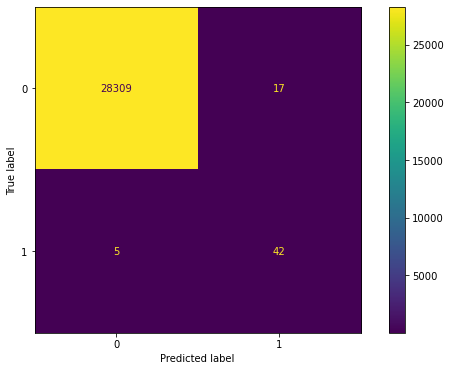

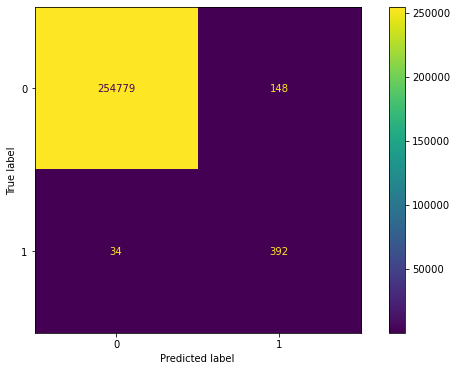

In [270]:
eval_metric(final_model_pipeline, X_train, y_train, X_test, y_test)

In [271]:
# import joblib
# joblib.dump(xgb_model, open('xgb_model_final.pkl', 'wb'))

import pickle
pickle.dump(final_model_pipeline, open("model_final", 'wb'))

### Save and Export Variables

In [272]:
# final_model = joblib.load(open('xgb_model_final.pkl', 'rb'))
final_model = pickle.load(open("model_final", "rb"))

In [273]:
df.sample()

,time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,amount,class,hour
183188,125983.000,0.183,-0.380,-0.496,-2.116,0.165,0.223,0.797,-0.004,-1.351,0.190,0.156,-0.665,-0.351,0.116,-0.864,1.371,-0.368,-0.898,1.018,0.329,0.086,-0.189,0.346,-0.173,-0.302,-0.502,-0.053,-0.008,156.000,0,34.000


In [274]:
sample = pd.DataFrame(df.iloc[70172]).drop(index="class").T
sample

,time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,amount,hour
70172,53868.000,1.169,-0.160,0.347,0.148,-0.723,-1.092,0.016,-0.213,0.252,-0.150,-0.297,-0.010,-0.273,0.313,1.164,0.349,-0.309,-0.438,-0.015,0.029,-0.095,-0.425,0.014,0.430,0.174,0.898,-0.094,0.016,64.960,14.000


In [275]:
final_model.predict(sample)

array([0], dtype=int64)

In [276]:
df.loc[df["class"]==1].sample(5)

,time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,amount,class,hour
123561,77154.000,-0.715,0.609,1.156,-0.268,-0.564,-0.619,0.698,0.070,-0.133,-1.025,1.501,-0.418,-1.590,-1.075,0.288,1.378,0.224,1.311,-0.896,-0.187,0.131,0.239,-0.090,0.412,-0.216,0.354,-0.062,0.008,129.000,1,21.000
57376,47982.000,-1.233,2.244,-1.704,1.493,-1.193,-1.686,-1.865,0.856,-1.974,-3.942,2.402,-3.394,-0.145,-4.330,0.759,-3.199,-4.480,-2.486,-0.096,0.208,0.560,0.166,-0.014,0.475,-0.219,0.303,0.466,0.250,0.760,1,13.000
149032,91554.000,-5.100,3.633,-3.844,0.183,-1.184,1.602,-3.006,-8.645,1.285,-3.717,3.719,-5.034,0.919,-4.220,-1.050,-1.691,-2.372,0.450,0.408,-2.806,8.280,-2.797,1.091,-0.159,0.532,-0.497,0.944,0.554,261.220,1,25.000
42428,41170.000,-6.498,4.751,-8.967,7.099,-6.958,-2.822,-10.333,4.032,-6.649,-11.634,6.878,-13.698,0.463,-13.044,-0.309,-12.318,-24.019,-9.335,1.952,0.568,2.158,0.112,0.216,0.585,0.760,0.082,1.415,0.035,83.380,1,11.000
59292,48884.000,-2.139,1.394,-0.612,1.049,-1.162,-0.768,-1.997,0.575,-0.981,-2.496,2.556,-3.530,-1.016,-3.455,-0.056,-2.468,-7.140,-1.271,-0.002,0.025,0.697,0.740,-0.155,-0.051,0.268,-0.469,-0.406,-0.152,19.730,1,13.000


In [277]:
sample = pd.DataFrame(df.iloc[[153230, 59292, 82093	, 243100, 117841]]).drop(columns="class")
sample

,time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,amount,hour
153230,100223.000,-19.642,14.706,-22.801,12.115,-14.898,0.841,-28.011,-11.920,-8.961,-18.913,4.971,-12.686,-1.071,-7.383,-2.992,-8.582,-13.807,-6.000,1.423,3.835,-8.229,3.318,2.585,0.195,-1.195,0.038,-4.127,-0.645,2.280,27.000
59292,48884.000,-2.139,1.394,-0.612,1.049,-1.162,-0.768,-1.997,0.575,-0.981,-2.496,2.556,-3.530,-1.016,-3.455,-0.056,-2.468,-7.140,-1.271,-0.002,0.025,0.697,0.740,-0.155,-0.051,0.268,-0.469,-0.406,-0.152,19.730,13.000
82093,59385.000,-7.627,-6.976,-2.078,3.417,4.459,-5.080,-6.579,1.760,-0.600,-4.002,2.612,-2.211,0.145,-5.282,-1.446,-2.342,-4.442,-0.812,0.255,2.875,1.225,-0.657,-0.331,-0.079,0.270,0.431,0.821,-1.056,18.980,16.000
243100,152165.000,-4.673,4.196,-8.392,7.743,-1.139,-2.095,-3.839,0.543,-1.528,-2.325,4.356,-8.663,-1.154,-13.482,1.208,-4.288,-5.652,-1.236,1.080,-0.180,0.554,0.656,0.482,-0.624,-0.296,0.375,-2.679,0.412,1.000,42.000
117841,75033.000,-0.430,0.986,0.646,0.317,0.616,-1.347,1.078,-0.162,-0.493,-1.040,-0.396,-0.665,-0.986,-0.661,0.344,0.531,0.278,0.356,-1.081,-0.115,-0.016,-0.208,-0.164,0.255,0.455,-0.505,-0.039,-0.006,30.140,20.000


In [278]:
final_model.predict(sample)

array([1, 1, 1, 1, 0], dtype=int64)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___